In [2]:
import json
import zipfile
import string
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.io as pio
import reverse_geocode
import ast
init_notebook_mode(connected=True)
%matplotlib inline

In [5]:
def saveCSV(zip_file_path, dir_name):
    count = 1
    # access TwitterJune2021 file
    general_archive = zipfile.ZipFile(zip_file_path,'r')
    # get the list of zip directories inside it
    for f in general_archive.namelist():

        archive = zipfile.ZipFile(f, 'r')
        # construct the path of all files based on the pattern of the above path
        file_path ="geoEurope/"+f[16:36]+".json"
        
        # access each file individually
        file = archive.open(file_path)
        df = pd.DataFrame()
        tweet = []
        for s in file.readlines():
            tweet.append(json.loads(s.decode("utf-8")))
      
        # reconstruct a dataframe with only necessary keys for our analysis
        try:
            print("normalizing json:", count)
            df = pd.json_normalize(tweet, meta ='user')[['id_str','created_at','text','coordinates.coordinates',
                                                        'user.id_str','user.screen_name','entities.user_mentions']]
                        
            # convert lists of json objects of user_mentions to a simple list containing all mentionned users            
            data_mentions = df['entities.user_mentions'].apply(lambda x: pd.json_normalize(x) if len(x)> 0 else None)
                
            for label, content in data_mentions.iteritems():
                if content is None:
                    pass
                else:
                    df['entities.user_mentions'].loc[label] = [int(x) for x in list(content['id_str'])]
            print('finished normalizing')
            # there are some missing tweets that cause KeyError in the above statement, we print the tweet, and the file name
        except:
            print(file_path,' Error')
                        
        # construct a DataFrame from the collection of filtered tweets in each file and save it as a csv
        df.to_csv(dir_name +"/csv"+ str(count)+".csv")
        print(count)
        print(file_path," done!")
        count +=1
    del df
    del tweet

In [267]:
file = open('geoEurope_2021060100.json','r')
tweets = []
for f in file.readlines():
    tweets.append(json.loads(f))

In [157]:
tweets

In [158]:
col = pd.json_normalize(tweets, meta='user').columns

In [2]:
for c in col:
    print(c)
print(len(col))

In [159]:
demo_pd = pd.json_normalize(tweets, meta='user')

In [257]:
type(demo_pd['entities.user_mentions'].iloc[1])

list

In [162]:
demo_mentions_data = demo_pd['entities.user_mentions'].apply(lambda x: pd.json_normalize(x) if len(x)> 0 else None)

In [4]:
demo_pd['entities.user_mentions'].iloc[1]

In [183]:
saveCSV("TwitterJune2021.zip","reduced_data")

In [3]:
li = []
for i in range(1,721):
    file_path = 'reduced_data/csv'+str(i)+'.csv'
    try:
        df = pd.read_csv(file_path, engine = 'python')
        li.append(df)
        print('Loading file: ', i)
    except: print('Error....',i)

Loading file:  1
Loading file:  2
Loading file:  3
Loading file:  4
Loading file:  5
Loading file:  6
Loading file:  7
Loading file:  8
Loading file:  9
Loading file:  10
Loading file:  11
Loading file:  12
Loading file:  13
Loading file:  14
Loading file:  15
Loading file:  16
Loading file:  17
Loading file:  18
Loading file:  19
Loading file:  20
Loading file:  21
Loading file:  22
Loading file:  23
Loading file:  24
Loading file:  25
Loading file:  26
Loading file:  27
Loading file:  28
Loading file:  29
Loading file:  30
Loading file:  31
Loading file:  32
Loading file:  33
Loading file:  34
Loading file:  35
Loading file:  36
Loading file:  37
Loading file:  38
Loading file:  39
Loading file:  40
Loading file:  41
Loading file:  42
Loading file:  43
Loading file:  44
Loading file:  45
Loading file:  46
Loading file:  47
Loading file:  48
Loading file:  49
Loading file:  50
Loading file:  51
Loading file:  52
Loading file:  53
Loading file:  54
Loading file:  55
Loading file:  56
L

Loading file:  440
Loading file:  441
Loading file:  442
Loading file:  443
Loading file:  444
Loading file:  445
Loading file:  446
Loading file:  447
Loading file:  448
Loading file:  449
Loading file:  450
Loading file:  451
Loading file:  452
Loading file:  453
Loading file:  454
Loading file:  455
Loading file:  456
Loading file:  457
Loading file:  458
Loading file:  459
Loading file:  460
Loading file:  461
Loading file:  462
Loading file:  463
Loading file:  464
Loading file:  465
Loading file:  466
Loading file:  467
Loading file:  468
Loading file:  469
Loading file:  470
Loading file:  471
Loading file:  472
Loading file:  473
Loading file:  474
Loading file:  475
Loading file:  476
Loading file:  477
Loading file:  478
Loading file:  479
Loading file:  480
Loading file:  481
Loading file:  482
Loading file:  483
Loading file:  484
Loading file:  485
Loading file:  486
Loading file:  487
Loading file:  488
Loading file:  489
Loading file:  490
Loading file:  491
Loading file

In [4]:
df = pd.concat(li, axis=0)
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)
df.reset_index(inplace=True)
del li

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13861538 entries, 0 to 13861537
Data columns (total 9 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   index                    int64  
 1   id_str                   object 
 2   created_at               object 
 3   text                     object 
 4   coordinates.coordinates  object 
 5   user.id_str              float64
 6   user.screen_name         object 
 7   entities.user_mentions   object 
 8   in_reply_to_user_id_str  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 951.8+ MB


In [9]:
df.drop(labels='index', inplace=True, axis=1)

In [10]:
df.loc[df['id_str'] == 1.3996279395835658e+18]

,id_str,created_at,text,coordinates.coordinates,user.id_str,user.screen_name,entities.user_mentions,in_reply_to_user_id_str
67610,1399627939583565824.0,Tue Jun 01 07:24:39 +0000 2021,Twijfel of leerlingen zichzelf gaan testen: ‘S...,NaN,108047571.0,mediamannetje,[],NaN
67611,1399627939583565824.0,Tue Jun 01 07:24:39 +0000 2021,This crew!! @team_goeleven you’re the 💣! \n\n“...,"[-9.3930611, 38.74952376]",17335732.0,chazdavies7,[],NaN


In [12]:
df.drop_duplicates(inplace=True)
# df.info()

In [13]:
df.isna().sum()

id_str                           47
created_at                        1
text                              5
coordinates.coordinates    12984888
user.id_str                     155
user.screen_name                164
entities.user_mentions          164
in_reply_to_user_id_str     6579791
dtype: int64

In [8]:
df.isna().sum()

id_str                           47
created_at                        1
text                              5
coordinates.coordinates    12984888
user.id_str                     155
user.screen_name                164
entities.user_mentions          164
in_reply_to_user_id_str     6579791
dtype: int64

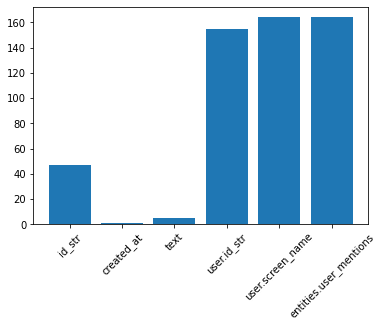

In [17]:
selected_columns_na = ['id_str','created_at','text','user.id_str','user.screen_name','entities.user_mentions']
plt.bar(selected_columns_na , df[selected_columns_na].isna().sum())
plt.xticks(rotation=45)
plt.savefig('cw_img/check_na.png')
plt.show()

Although we have some missing values (not entire row), we still can keep them to perform our analysis. For example in part 1, we will not need to care about the text in tweeds rather caring about the time-stamp and the uniqueness of the values.

In [8]:
df[df['text'].isna()]

,id_str,created_at,text,coordinates.coordinates,user.id_str,user.screen_name,entities.user_mentions,in_reply_to_user_id_str
144954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1327973,1400613033823588357,Fri Jun 04 00:39:04 +0000 2021,NaN,NaN,3.070198e+08,eljefedan,[],NaN
9241325,1406891597170630662,Mon Jun 21 08:27:50 +0000 2021,NaN,NaN,1.263806e+18,ReeceNuttall_,[],NaN
9802108,1407327037505822722,Tue Jun 22 13:18:07 +0000 2021,NaN,NaN,1.405892e+18,Hortens25036102,[],NaN
11304107,1408488557979869184.0,Fri Jun 25 18:13:35 +0000 2021,NaN,NaN,1.139467e+18,kcm__yz,[],NaN


In [18]:
df.drop(index=144954,inplace=True)

In [13]:
df.isna().sum()

id_str                           46
created_at                        0
text                              4
coordinates.coordinates    12984887
user.id_str                     154
user.screen_name                163
entities.user_mentions          163
in_reply_to_user_id_str     6579790
dtype: int64

In [19]:
df['created_at'].apply(len).unique()

In [20]:
erronous_date_df_row_index = df[df['created_at'].apply(len) != 30].index

In [21]:
df.drop(axis=0, index=erronous_date_df_row_index, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13857163 entries, 0 to 13861537
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   id_str                   object 
 1   created_at               object 
 2   text                     object 
 3   coordinates.coordinates  object 
 4   user.id_str              float64
 5   user.screen_name         object 
 6   entities.user_mentions   object 
 7   in_reply_to_user_id_str  float64
dtypes: float64(2), object(6)
memory usage: 951.5+ MB


In [16]:
# df.reset_index(inplace=True)
# df.drop(axis=1, labels='index',inplace=True)

In [24]:
df.set_index(pd.to_datetime(df['created_at']), inplace=True)

In [25]:
df.head(3)

,id_str,created_at,text,coordinates.coordinates,user.id_str,user.screen_name,entities.user_mentions,in_reply_to_user_id_str
created_at,,,,,,,,
2021-05-31 23:00:00+00:00,1399500939766210560,Mon May 31 23:00:00 +0000 2021,klingel,"[13.435, 52.481388]",1.092190e+09,rh_neukoelln,[],NaN
2021-05-31 23:00:00+00:00,1399500940110094340,Mon May 31 23:00:00 +0000 2021,@HelenaBrts @Sibirskykot @Chadaew Описание сос...,NaN,1.199788e+09,SeliusM,"['1186645124', '922162684325498880', '516260791']",1.186645e+09
2021-05-31 23:00:00+00:00,1399500942043660290,Mon May 31 23:00:00 +0000 2021,po no que un pavo de 51 años me estaba tirando...,NaN,3.987683e+08,AleStarbucks,[],NaN


In [26]:
daily_tweets = df.loc['2021-06-01':]['created_at'].resample('D').count()

In [1]:
def plot_daily(daily_tweets, xlabel, ylabel, img_save_path,ylim_min,ylim_max):
    fig, ax = plt.subplots(figsize = (25,10))
    daily_tweets.plot(ax=ax)
#     ax.set_title(title, fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    ax.set_xticks(daily_tweets.index[1:])
    ax.set_xticklabels(daily_tweets.index[1:].strftime('%d'))
    ax.set_xlabel(xlabel, fontsize=21)
    ax.set_ylabel(ylabel, fontsize=21)
    plt.ylim(ylim_min, ylim_max)
    plt.xticks(fontsize= 17)
    plt.yticks(fontsize= 17)
    plt.grid(axis = 'y')
    plt.savefig(img_save_path)

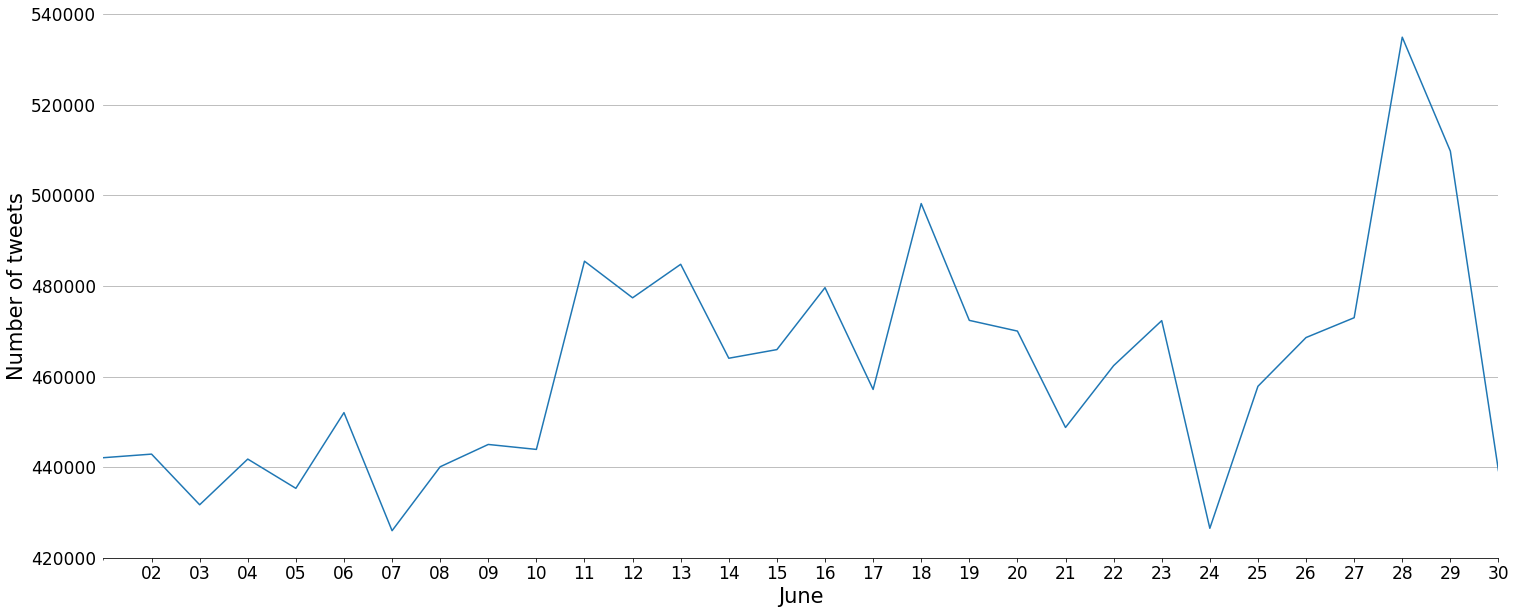

In [186]:
plot_daily(daily_tweets, 'June','Number of tweets','cw_img/tweets_per_day.png', 420000, 540000)

We notice a low number of tweets in the first and third weeks. Whereas there is a relatively large number of tweets in the second and last week of june. In the 7th and 24th of June the number of tweets decreased to arround 425k tweets and increased in the 28th to 534k in four days.

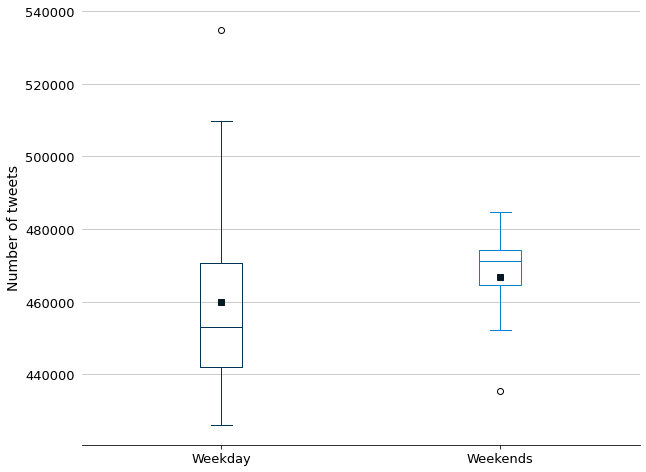

In [37]:
fig, ax = plt.subplots(figsize = (10,8))
weekday_color = dict(color = '#003554')
weekend_color = dict(color = '#0582CA')
mean_color = {"markerfacecolor":"#051923", "markeredgecolor":"#051923","marker":'s'}
ax.boxplot(daily_tweets[daily_tweets.index.weekday < 5],positions =[0], showmeans=True,labels=['Weekday'], 
           boxprops=weekday_color, medianprops=weekday_color, whiskerprops=weekday_color,capprops=weekday_color,
          meanprops=mean_color)
ax.boxplot(daily_tweets[daily_tweets.index.weekday > 4], positions = [1], showmeans=True, labels=['Weekends'],
          boxprops=weekend_color, medianprops=weekend_color, whiskerprops=weekend_color,capprops=weekend_color,
          meanprops=mean_color)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', alpha=0.5)
ax.set_ylabel("Number of tweets", fontsize=14)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.savefig('cw_img/1.3.boxplot_weekdays_vs_weekends.png')
plt.show()

1. The distribution of the number of tweets during weekdays is right skewed whereas for the weekends is left skewed. We can also see from the plots that the number of tweets for weekdays is more spread than weekends.
2. From the plot we clearly see that the average number of tweets during weekends is higher than during weekdays. In fact, the difference in the central tendency of both for weekends and weekdays is even bigger. The average number of tweets during weekdays is pulled to a bigger value due to the outlier on the 28th of June, 2021 and the average number of tweets during weekends is pulled down due to the outlier on the 7th of June, 2021 which brought them closer to each others.
3. The plots show that the number of tweets during weekdays range from 420,000 to 515,000 whereas for weekends the number is between 455,000 to 485,000 approximately. However, 75% of the numbers of tweets during weekdays lie below 470,000 while 50% of the numbers of tweets during weekends lie above 475,000

In [38]:
hourly_tweets = df.loc['2021-06-01':]['created_at'].resample('H').count()
weekday_h_tweets = hourly_tweets[hourly_tweets.index.weekday < 5]
weekend_h_tweets = hourly_tweets[hourly_tweets.index.weekday > 4]

In [39]:
avg_weekend_h_tweets = weekend_h_tweets.groupby(weekend_h_tweets.index.hour,axis=0).mean()
avg_weekday_h_tweets = weekday_h_tweets.groupby(weekday_h_tweets.index.hour,axis=0).mean()

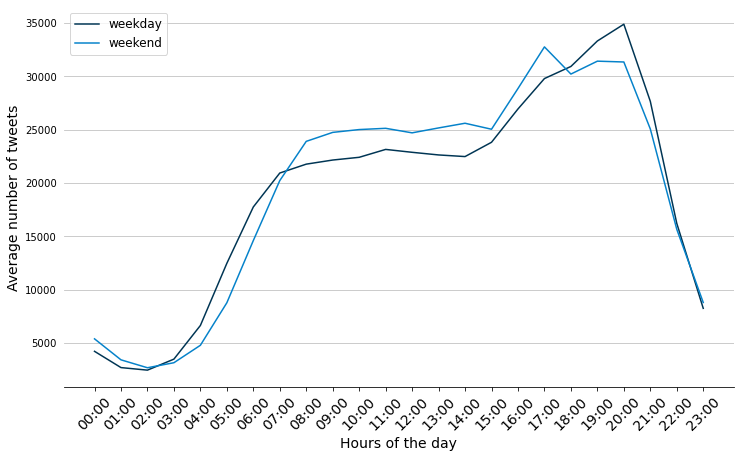

In [51]:
fig, ax = plt.subplots(figsize = (12,7))
ax.plot(avg_weekday_h_tweets.index,avg_weekday_h_tweets, color= '#003554', label='weekday')
ax.plot(avg_weekend_h_tweets.index,avg_weekend_h_tweets, color='#0582CA', label='weekend')
# ax.set_title("Average number of tweets per hour during weedays and weekends")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.legend(prop={"size":12})
plt.grid(color='grey', axis='y', alpha=.5)
ax.set_ylabel("Average number of tweets", fontsize = 14)
ax.set_xlabel("Hours of the day", fontsize = 14)
ax.set_xticks(range(0,24))
ax.set_xticklabels(pd.date_range(0, periods=24, freq='H').strftime('%H:00'), fontsize = 14)
plt.xticks(rotation=45)
# plt.savefig('cw_img/1.4.avg_tweets_weekend_weekdays.png')
plt.show()

From the graph we notice that the two plots intersect three times. Keeping the time zone difference in mind, from 7AM to 6PM the average number of tweets during weekends is higher than the average number of tweets during weekdays, that is probably due to the fact most people will be working or studying. However, after 6PM to 11PM, we notice that the average number of tweets during weekends falls below weekday, that is most likely caused by the fact that people usually go out during weekends at night, while during workdays people may be staying at home at that time. During weekdays, people are most likely to sleep early, as a result, the plot of weekdays falls below the plot of weekends until early morning where people are most likely to sleep during weekends.

## Part 2

Since both country and city columns were written in multiple languages, we preferred to discard them and only keep the coordinates column and use reverse geocoding to get the full address back.

In [52]:
df['coordinates.coordinates'].head()

created_at
2021-05-31 23:00:00+00:00      [13.435, 52.481388]
2021-05-31 23:00:00+00:00                      NaN
2021-05-31 23:00:00+00:00                      NaN
2021-05-31 23:00:01+00:00                      NaN
2021-05-31 23:00:01+00:00    [8.98777778, 44.4975]
Name: coordinates.coordinates, dtype: object

In [53]:
coordinates = [x.split(', ') for x in [x[1:-1] for x in df['coordinates.coordinates'].dropna()]]

In [54]:
coordinates = pd.DataFrame(coordinates, columns=['long','lat'])

In [55]:
coordinates.head()

,long,lat
0,13.435,52.481388
1,8.98777778,44.4975
2,30.52457392,50.45086087
3,24.03134286,49.84180882
4,1.893817,41.545639


In [56]:
coordinates.set_index(df['coordinates.coordinates'].dropna().index,inplace=True)

In [57]:
coordinates = coordinates.astype(float)

https://pypi.org/project/reverse-geocode/

In [58]:
reversed_coord = reverse_geocode.search(coordinates=coordinates[coordinates.columns[::-1]])

In [59]:
coordinates['country'] = [rc['country'] for rc in reversed_coord]
coordinates['city'] = [rc['city'] for rc in reversed_coord]

In [62]:
coordinates.head()

,long,lat,country,city
created_at,,,,
2021-05-31 23:00:00+00:00,13.435000,52.481388,Germany,Berlin Treptow
2021-05-31 23:00:01+00:00,8.987778,44.497500,Italy,Piccarello
2021-05-31 23:00:01+00:00,30.524574,50.450861,Ukraine,Kyiv
2021-05-31 23:00:01+00:00,24.031343,49.841809,Ukraine,Lviv
2021-05-31 23:00:02+00:00,1.893817,41.545639,Spain,Olesa de Montserrat


In [66]:
european_countries = json.load(open('world_countries_geojson.geojson'))

we download the geojson file from https://rtr.carto.com/tables/world_countries_geojson/public/map

In [67]:
european_countries['features'][1]['properties']

{'cartodb_id': 240,
 'homepart': 1,
 'tiny': -99,
 'abbrev_len': 4,
 'long_len': 7,
 'name_len': 7,
 'adm0_a3_wb': -99,
 'adm0_a3_un': -99,
 'woe_id_eh': 23424943,
 'woe_id': 23424943,
 'wikipedia': -99,
 'gdp_year': -99,
 'lastcensus': 2002,
 'pop_year': -99,
 'pop_est': 13711597,
 'mapcolor13': 5,
 'mapcolor9': 5,
 'mapcolor8': 6,
 'mapcolor7': 2,
 'brk_diff': 0,
 'su_dif': 0,
 'geou_dif': 0,
 'level': 2,
 'adm0_dif': 0,
 'labelrank': 3,
 'scalerank': 0,
 'region_wb': 'Sub-Saharan Africa',
 'subregion': 'Western Africa',
 'region_un': 'Africa',
 'continent': 'Africa',
 'adm0_a3_us': 'SEN',
 'adm0_a3_is': 'SEN',
 'woe_note': 'Exact WOE match as country',
 'wb_a3': 'SEN',
 'wb_a2': 'SN',
 'un_a3': '686',
 'iso_n3': '686',
 'iso_a3': 'SEN',
 'iso_a2': 'SN',
 'fips_10_': 'SG',
 'income_grp': '4. Lower middle income',
 'economy': '7. Least developed region',
 'name_alt': None,
 'name_sort': 'Senegal',
 'note_brk': None,
 'note_adm0': None,
 'formal_fr': None,
 'formal_en': 'Republic of Se

Map countries to their country code to create a column for country codes used for plotting later

In [70]:
country_name_code_map = {}
for feature in european_countries['features']:
    feature['id'] = feature['properties']['iso_a3']
    country_name_code_map[feature['properties']['name_long']] = feature['id']

Map countries to their continent to filter only for europ countries

In [71]:
conntry_to_continent_map = {}
for feature in european_countries['features']:
    feature['continent'] = feature['properties']['continent']
    conntry_to_continent_map[feature['properties']['name_long']] = feature['continent']

In [14]:
# conntry_to_continent_map

In [72]:
country_name_code_map[''] = 'No Country'
conntry_to_continent_map[''] = 'No Country'

In [73]:
# country_name_code_map.keys()

In [74]:
coordinates.loc[coordinates['country'] == "Syrian Arab Republic",'country']= 'Syria'

In [75]:
coordinates.loc[coordinates['country'] == "Holy See (Vatican City State)",'country']= 'Vatican'

In [76]:
coordinates.loc[coordinates['country'] == "Svalbard and Jan Mayen",'country'] = 'Norway'

In [77]:
coordinates.loc[coordinates['country'] == "Iran, Islamic Republic of",'country'] = 'Iran'

In [78]:
coordinates.loc[coordinates['country'] == "Faroe Islands",'country'] = 'Denmark'

In [79]:
coordinates.loc[coordinates['country'] == "Moldova, Republic of",'country'] = 'Moldova'

In [80]:
coordinates.loc[coordinates['country'] == "Tanzania, United Republic of",'country'] = 'Tanzania'

In [81]:
coordinates['continent'] = coordinates['country'].apply(lambda x: conntry_to_continent_map[x])

In [82]:
coordinates['country_code'] = coordinates['country'].apply(lambda x: country_name_code_map[x])

In [83]:
coordinates.head()

,long,lat,country,city,continent,country_code
created_at,,,,,,
2021-05-31 23:00:00+00:00,13.435000,52.481388,Germany,Berlin Treptow,Europe,DEU
2021-05-31 23:00:01+00:00,8.987778,44.497500,Italy,Piccarello,Europe,ITA
2021-05-31 23:00:01+00:00,30.524574,50.450861,Ukraine,Kyiv,Europe,UKR
2021-05-31 23:00:01+00:00,24.031343,49.841809,Ukraine,Lviv,Europe,UKR
2021-05-31 23:00:02+00:00,1.893817,41.545639,Spain,Olesa de Montserrat,Europe,ESP


In [88]:
tweets_euro_country = coordinates[coordinates['continent']=='Europe']

In [89]:
tweets_euro_country.head()

,long,lat,country,city,continent,country_code
created_at,,,,,,
2021-05-31 23:00:00+00:00,13.435000,52.481388,Germany,Berlin Treptow,Europe,DEU
2021-05-31 23:00:01+00:00,8.987778,44.497500,Italy,Piccarello,Europe,ITA
2021-05-31 23:00:01+00:00,30.524574,50.450861,Ukraine,Kyiv,Europe,UKR
2021-05-31 23:00:01+00:00,24.031343,49.841809,Ukraine,Lviv,Europe,UKR
2021-05-31 23:00:02+00:00,1.893817,41.545639,Spain,Olesa de Montserrat,Europe,ESP


In [ ]:
count_tweets_per_euro_country = pd.DataFrame(tweets_euro_country['country_code'].value_counts())

In [219]:
tweets_per_spain_b7 = pd.DataFrame(tweets_euro_country[(tweets_euro_country.index <= '2021-06-12')][['country_code','long','lat']])

In [220]:
tweets_per_spain_b7[tweets_per_spain_b7['country_code'] == 'ESP']

,country_code,long,lat
created_at,,,
2021-05-31 23:00:02+00:00,ESP,1.893817,41.545639
2021-05-31 23:00:02+00:00,ESP,1.893817,41.545639
2021-05-31 23:00:02+00:00,ESP,0.643211,41.597622
2021-05-31 23:00:05+00:00,ESP,-7.866325,42.340106
2021-05-31 23:00:15+00:00,ESP,-5.995472,37.392706
...,...,...,...
2021-06-11 23:48:26+00:00,ESP,-7.088920,37.727370
2021-06-11 23:50:01+00:00,ESP,1.893817,41.545639
2021-06-11 23:52:01+00:00,ESP,1.893817,41.545639


In [221]:
tweets_per_spain_a7 = pd.DataFrame(tweets_euro_country[(tweets_euro_country.index > '2021-06-12')][['country_code','long','lat']])

In [222]:
tweets_per_spain_a7[tweets_per_spain_a7['country_code'] == 'ESP']

,country_code,long,lat
created_at,,,
2021-06-12 00:00:02+00:00,ESP,0.643211,41.597622
2021-06-12 00:00:02+00:00,ESP,1.893817,41.545639
2021-06-12 00:00:02+00:00,ESP,1.893817,41.545639
2021-06-12 00:00:06+00:00,ESP,-7.866325,42.340106
2021-06-12 00:00:06+00:00,ESP,-0.459505,39.592478
...,...,...,...
2021-06-30 22:55:02+00:00,ESP,1.893817,41.545639
2021-06-30 22:55:16+00:00,ESP,-3.683330,40.400000
2021-06-30 22:56:33+00:00,ESP,1.860200,41.254700


In [91]:
count_tweets_per_euro_country.columns = ['count']
count_tweets_per_euro_country.head()

,count
GBR,190905
ESP,122162
DEU,69216
ITA,66001
-99,47326


In [93]:
fig = px.choropleth_mapbox(count_tweets_per_euro_country, 
                    locations=count_tweets_per_euro_country.index, 
                    color = 'count', 
                    geojson=european_countries,
                    hover_name='count',
                    hover_data=['count'],
                    mapbox_style='carto-positron',
                    center = {'lat': 46, 'lon': 2.2},
                    zoom=3,
                    opacity=0.8,
                    color_continuous_scale=['#e6e6e6','#003554']
                   )
fig.update_layout(title_text='Number of tweets per european country', title_x=0.5, ).show(renderer='chrome')

In [189]:
import plotly.graph_objects as go
fig = go.Figure(go.Densitymapbox(lat=tweets_euro_country.lat, 
                                 lon=tweets_euro_country.long, 
                                 z=np.ones(len(tweets_euro_country)),
                                 radius=1, 
                                 opacity=0.8, 
                                 colorscale= ['#e6e6e6','#003554'], showscale = False))
fig.update_layout(mapbox_style="carto-positron", title_text='Density of the numbers of tweets per location',
                  title_x=0.5, colorway = ['#e6e6e6','#003554']).show(renderer='chrome', zoom=8, 
                                                                      center = {'lat': 46, 'lon': 2.2})

Taking into account only geo-tagged tweets, from the choropleth map we notice that the highest number of tweets comes from the UK, Spain, Germany, Italy, and France. Although the UK has less population than Germany, it has considerably a larger number of tweets. By plotting a more detailed map using the coordinates, we notice that most tweets come from larger cities in those countries; for instance, for the UK, we have a high density in London, Manchester, Liverpool, and Birminghham. While in the other countries, most tweets come from the capital, for example in France we notice that most tweets come from Paris, for Spain we see a large number of tweets from Madrid, Germany from Berlin and Italy from Milan.

## Part 3

In [95]:
df['user.screen_name'].nunique()

In [144]:
df['user.id_str'].nunique()

776366

we notice that there are multiple user ids having the same user screen name. We will use the user ids that are unique to get a more complete analysis.

In [96]:
tweets_per_user = df['user.id_str'].value_counts()

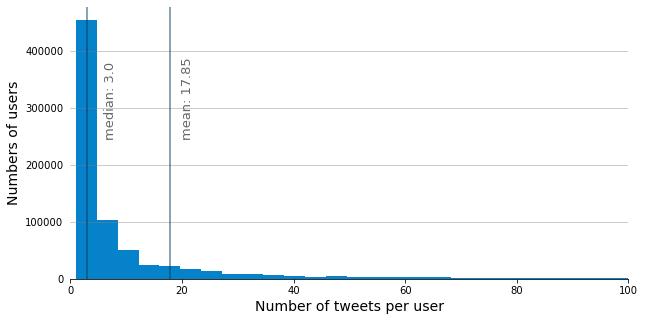

In [100]:
fig, ax = plt.subplots(figsize = (10,5))
# get rid of top, left, and right box lines of the plot
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('none')
ax.grid(color='grey', axis='y', alpha=0.5)
ax.set_ylabel("Numbers of users", fontsize=14)
ax.set_xlabel("Number of tweets per user", fontsize=14)
# ax.set_title("Distribution of the number of tweets per user")
ax.axvline(tweets_per_user.mean(), alpha=0.6, color='#003554')
ax.text(tweets_per_user.mean()+2, y = 250000, s="mean: "+ "{:.2f}".format(tweets_per_user.mean()), rotation = 90, alpha=0.6, fontsize=13)
ax.axvline(tweets_per_user.median(), alpha=0.6, color='#003554')
ax.text(tweets_per_user.median()+3, y = 250000, s="median: "+ str(tweets_per_user.median()), rotation = 90, alpha=0.6, fontsize=13)
# ax.set_ylim(0,100000)
ax.set_xlim(0,100)
ax.hist(tweets_per_user, bins=tweets_per_user.nunique()*2, color='#0582CA')
plt.savefig('cw_img/3.1.tweets_per_user.png')
plt.show()

We limited the x-axis to 100 for the clarity of the plot. We notice that the plot is right skewed. The median is 3 posts per user and the mean is almost 18. We can clearly see that almost 450k users have one to five tweets and 150k have between 5 to 12 tweets. Which means, almost 77.28% of all the users we have in our data have tweeted one to 12 tweets.

In [101]:
index_list_top_users = [x for x in tweets_per_user.iloc[:5].index]

In [102]:
index_list_top_users

[1384110594.0,
 1.2116064333990953e+18,
 1.382496899744301e+18,
 9.741889409734861e+17,
 161262801.0]

In [103]:
# get the screen name for the users that have the most number of tweets
df[df['user.id_str'].isin(index_list_top_users)]['user.screen_name'].unique()

array(['HoraCatalana', 'RadioTeddyMusic', 'casimiroperezc1',
       'Maria70221974', 'AyferGl02976871'], dtype=object)

In [72]:
# print as an example the tweets of HoraCatalana
df[df['user.id_str'] == tweets_per_user.index[0]]

,id_str,created_at,text,coordinates.coordinates,user.id_str,user.screen_name,entities.user_mentions,in_reply_to_user_id_str
created_at,,,,,,,,
2021-05-31 23:00:02+00:00,1399500947898961924,Mon May 31 23:00:02 +0000 2021,És la una en punt de la nit,"[1.893817, 41.545639]",1.384111e+09,HoraCatalana,[],NaN
2021-05-31 23:05:01+00:00,1399502204457865216,Mon May 31 23:05:01 +0000 2021,Passen cinc minuts de la una de la nit,"[1.893817, 41.545639]",1.384111e+09,HoraCatalana,[],NaN
2021-05-31 23:07:01+00:00,1399502707212394499,Mon May 31 23:07:01 +0000 2021,És mig quart de dues de la nit,"[1.893817, 41.545639]",1.384111e+09,HoraCatalana,[],NaN
2021-05-31 23:10:02+00:00,1399503465123024903,Mon May 31 23:10:02 +0000 2021,Falten cinc minuts per a un quart de dues de l...,"[1.893817, 41.545639]",1.384111e+09,HoraCatalana,[],NaN
2021-05-31 23:15:02+00:00,1399504722713849856,Mon May 31 23:15:02 +0000 2021,És un quart de dues de la nit,"[1.893817, 41.545639]",1.384111e+09,HoraCatalana,[],NaN
...,...,...,...,...,...,...,...,...
2021-06-30 22:40:01+00:00,1410367548500160518,Wed Jun 30 22:40:01 +0000 2021,Falten cinc minuts per a tres quarts d'una de ...,"[1.893817, 41.545639]",1.384111e+09,HoraCatalana,[],NaN
2021-06-30 22:45:02+00:00,1410368808674549764,Wed Jun 30 22:45:02 +0000 2021,Són tres quarts d'una de la nit,"[1.893817, 41.545639]",1.384111e+09,HoraCatalana,[],NaN
2021-06-30 22:50:02+00:00,1410370068496752642,Wed Jun 30 22:50:02 +0000 2021,Passen cinc minuts de tres quarts d'una de la nit,"[1.893817, 41.545639]",1.384111e+09,HoraCatalana,[],NaN


In [73]:
df[df['user.id_str'] == tweets_per_user.index[0]].resample('H')['text'].count().head() 

created_at
2021-05-31 23:00:00+00:00    16
2021-06-01 00:00:00+00:00    16
2021-06-01 01:00:00+00:00    16
2021-06-01 02:00:00+00:00    16
2021-06-01 03:00:00+00:00    16
Freq: H, Name: text, dtype: int64

In [74]:
df[df['user.id_str'] == tweets_per_user.index[0]].resample('H')['text'].count().mean()

15.948611111111111

If we look at the first account "HoraCatalana", we will find that the accounts is tweeting, in spanish, the current time. Furthermore, when we resample by hour and count the number of tweets this account has posted, we find that the average number of tweets each hour of the day is 16 (24h/24h), which make confirms that this account is a bot which is similar to most of the accounts with very high number of tweets.

## Mentions

In [104]:
users_and_mentions = df[['user.id_str','entities.user_mentions']].copy().reset_index()

In [105]:
users_and_mentions.head()

,created_at,user.id_str,entities.user_mentions
0,2021-05-31 23:00:00+00:00,1.092190e+09,[]
1,2021-05-31 23:00:00+00:00,1.199788e+09,"['1186645124', '922162684325498880', '516260791']"
2,2021-05-31 23:00:00+00:00,3.987683e+08,[]
3,2021-05-31 23:00:01+00:00,7.472595e+08,[]
4,2021-05-31 23:00:01+00:00,2.858864e+09,[]


In [106]:
users_and_mentions.dropna(inplace=True)

In [197]:
users_and_mentions.nunique()

created_at                2368273
user.id_str                776366
entities.user_mentions    3464659
dtype: int64

In [107]:
users_and_mentions.drop(index=users_and_mentions[users_and_mentions['entities.user_mentions'] == '[]'].index, inplace=True)

In [108]:
users_and_mentions.head()

,created_at,user.id_str,entities.user_mentions
1,2021-05-31 23:00:00+00:00,1.199788e+09,"['1186645124', '922162684325498880', '516260791']"
13,2021-05-31 23:00:02+00:00,1.346758e+18,"['1365364671914651648', '327149170']"
29,2021-05-31 23:00:06+00:00,1.199078e+18,"['849536921969856515', '215262799', '132078783..."
30,2021-05-31 23:00:07+00:00,1.232421e+18,['4112685490']
33,2021-05-31 23:00:07+00:00,4.892020e+09,['1228462958201704448']


In [109]:
# get index for unstructured mentions
index_unstructured_mentions = []
for l,c in users_and_mentions['entities.user_mentions'].iteritems():
    if '{' in c:
        index_unstructured_mentions.append(l)

In [33]:
len(index_unstructured_mentions)

1729582

In [207]:
count = 0
for l, c in users_and_mentions.loc[index_unstructured_mentions,'entities.user_mentions'].iteritems():

    try:
        # convert string elements to lists so it can be processed as a list of json objects using json_normalize
        list_mentions = [x for x in pd.json_normalize(ast.literal_eval(users_and_mentions.loc[l,'entities.user_mentions']))['id_str']]
    except:
        # for the case where the element is not a string, assign it directly
        list_mentions = c
        
    users_and_mentions.loc[l,'entities.user_mentions'] = str(list_mentions)
    count += 1
    print(count)


In [34]:
users_and_mentions['entities.user_mentions'].count()

5901797

In [290]:
users_and_mentions.head().iloc[0]

created_at                                        2021-05-31 23:00:00+00:00
user.id_str                                                    1199787888.0
entities.user_mentions    ['1186645124', '922162684325498880', '516260791']
Name: 1, dtype: object

Converting back the mentions of json objects to lists of mentionned users that were initially not converted for some reasong is taking time (433 objects in 12 hours), we have 1724386 elements to be converted which can take roughly 165 days. Taking out those elements, we are left with 5,906,993 user_mentions elements (not empty)

In [210]:
7631379 - 1724386

5906993

In [110]:
def delete_unstructured_mentions(df, mentions_column):
    """
    Delete items of the dataframe that has unstructured mention items (the ones that were not converted to list of
    user ids)
    
    :param 
    - df: a pandas dataframe that contains mention lists in each element (tweet)
    mentions_column: the name of the column containing mentions
    - mentions_column: the name of the column containing mentions' lists
    """
    index_unstructured_mentions = []
    for l,c in users_and_mentions['entities.user_mentions'].iteritems():
        if '{' in c:
            index_unstructured_mentions.append(l)
    df.drop(index= index_unstructured_mentions, inplace=True)
    
    

In [111]:
delete_unstructured_mentions(users_and_mentions, 'entities.user_mentions')

In [36]:
len(users_and_mentions)

5901797

In [112]:
def mention_per_user_df(df,mentions_column, users_column):
    """
    This method takes a dataframe that contains the raw lists of mentions for each tweet
    and converts it to a 1D array then returns it as a pandas series
    
    param: df, mentions_column
    df: a pandas dataframe that contains mention lists in each element (tweet)
    mentions_column: the name of the column containing mentions' lists
    """
    count = 0
    i = 0
    mentions_list = []
    user_list = []
    for c in df[mentions_column]:
        count += 1
        for m in ast.literal_eval(c):
            mentions_list.append(m)
            user_list.append(df.iloc[i][users_column])
        i += 1
        if count%100000 == 0:
            print(count)
    user_mention_disct = {'user': user_list, 'mention': mentions_list}
    
    return pd.DataFrame(user_mention_disct)

In [113]:
user_per_mention_df = mention_per_user_df(users_and_mentions,'entities.user_mentions', 'user.id_str')

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000


In [115]:
user_per_mention_df.head()

,user,mention
0,1.199788e+09,1186645124
1,1.199788e+09,922162684325498880
2,1.199788e+09,516260791
3,1.346758e+18,1365364671914651648
4,1.346758e+18,327149170


In [116]:
user_per_mention_df['mention'].value_counts()[:5]

10228272      13787
3131144855    10216
68034431      10007
335141638      9465
98149527       9226
Name: mention, dtype: int64

<BarContainer object of 5 artists>

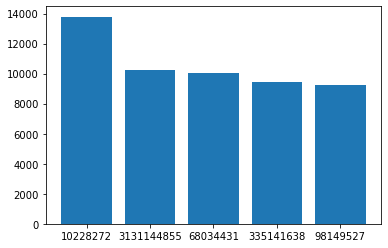

In [131]:
plt.bar(user_per_mention_df['mention'].value_counts()[:5].index,user_per_mention_df['mention'].value_counts()[:5].values)

In [132]:
for x in df['text']:
    if '@BorisJohnson' in x:
        print(x)

@Linda36758099 @BorisJohnson He booked the date well before   a protest was thought of...
@padraigpostal @PadraigBelton @BorisJohnson is a baptised Roman Catholic
I've just signed the petition asking @BorisJohnson and @MattHancock to pause the major reorganisation of the NHS an… https://t.co/LljFKnr6z3
@Matthew82069336 @BorisJohnson I'm so disgruntled, I feel sick.
@DehennaDavison @carriesymonds @BorisJohnson Another ploy to deflect the real problems of our country
This… https://t.co/tp5UxVyyWJ
@UKgovcomms @BorisJohnson @JoeBiden @10DowningStreet @FBI you allowed this guy called Nnamdi Kanu to stayed in Uk… https://t.co/TB41dZjFBP
@BorisJohnson I'm due to have my vaccine on Sunday, and I've bee happy to go along with this as all along we've bee… https://t.co/9MNTMPaV3d
Nothing to be proud of @BorisJohnson, MURDERER. https://t.co/EZqmOcgivb
@torysleazeUK @BorisJohnson He’ll screw her over just like he does the country. This guy doesn’t know the meaning of loyalty
@johnand68038424 @GMB @

Talk of the June 21st unlock being postponed got me thinking... Not happening @BorisJohnson, the 21sy happens as pl… https://t.co/wJyK48kexb
Talk of the June 21st unlock being postponed got me thinking... Not happening @BorisJohnson, the 21st happens as pl… https://t.co/2bexFvZz2R
Do it @BorisJohnson if you don’t now you never will. The end is here better for you to end it rather than the people
@blackoscar1 @SpammyFritter @Jessrocks71 @AnDexVin @ClareRi60008604 @Willow__Bella @BorisJohnson Cos you drive a slow Golf
@ToxicHGV @BorisJohnson @pritipatel @DominicRaab @Number10press That must be all the women and children in danger w… https://t.co/amV10ZgFXH
@LozzaFox Not at all following the @BorisJohnson  rhetoric threatening 21st June delay. Nobody now complying so she… https://t.co/gn6HerhNKt
@jaycee1001 @BorisJohnson @pritipatel @metpoliceuk @GOVUK #limpdick
@BorisJohnson @NicolaSturgeon  my taxes pay for you so please listen. I won’t continue with any of this until we ge… https://t.c

@MONICA47281427 @Ericdun19416783 @LibertyLins Yes &amp; there's nothing @BorisJohnson can do about it. It's part of Ger… https://t.co/gkNOqA3eSE
@pritipatel @BorisJohnson @carriesymonds Congratulations @BorisJohnson and Mrs Johnson and Wilfred ,may the Lord bl… https://t.co/tRxgBUGrLQ
@viewsfromleft @BorisJohnson ALL GP practices are privately owned . They always have been. They are paid by the NHS… https://t.co/Fhn0Xildgx
Received donations from companies that DON'T EVEN EXIST! 
How did you manage that @BorisJohnson? Pray do tell, we A… https://t.co/XM58tQPtWg
@themralex6 @sunick51 @piersmorgan @BorisJohnson Just out of interest, which party leader have you ever trusted 🤷‍♂️. None for me
@Hellsbellsmac @BorisJohnson 👏👏
NO NO NO! Enough is enough @BorisJohnson
@andersleijersta @pritipatel @BorisJohnson Dear God please stop.
@paulwaugh @BorisJohnson Oh yes! We believe all that!
@dayvidart @luckyma_man @stevelane100 @GovernmentSauce @BorisJohnson #twatwaffle https://t.co/t7fR4MmzdF
@reds

@Conservatives @GavinWilliamson @RishiSunak @BorisJohnson the lying racist incompetent mysoginistic PM
@LawofL @BorisJohnson https://t.co/G619gW7fIp

🤔🤔🤔🤔
@toryboypierce @grizzly712 @BorisJohnson You've changed your tune
@nodsaibot @BorisJohnson Looool. Someone's been groomed.
@Conservatives @GavinWilliamson @RishiSunak @BorisJohnson the lying racist incompetent mysoginistic PM. Levelling u… https://t.co/VZL89fVWeP
@suejustlooking @MailOnline Like @BorisJohnson has even bothered looking at the data! He is working toward the next 150,000 deaths
@interestedbys10 @13sarahmurphy @Rob_Merrick @LizzyJPrice He @BorisJohnson , Means Great Best Fathering Scheme :/ :(
@BorisJohnson
Again you lied in interview all teachers do not start on £30,000 per year
https://t.co/8hNNgZaQk3
@michaelgove @Nigel_Farage @DominicRaab @Jacob_Rees_Mogg @johnredwood @SuellaBraverman @RobertJenrick @BorisJohnson… https://t.co/4Y0e8tzja7
@DavidGHFrost @michaelgove @BorisJohnson the lying racist incompetent mysoginist

This is damning of Johnson's leadership and Sunak's stewardship next door. @RishiSunak @BorisJohnson… https://t.co/maZ042IuFT
https://t.co/2BbIgYTjn7 @GretaThunberg @BorisJohnson @POTUS @EmmanuelMacron STOP THIS MADNESS NOW!!!!
@MattHancock @BorisJohnson @10DowningStreet if people test 2-3 times a week for their work why do you and your budd… https://t.co/LHzSVvuR7B
@WeddingPhots @lorenkristie @kebrooks39 @BorisJohnson It is concerning. They are just making it up as they go along… https://t.co/OP127NQ9vB
@brianmoore666 Trained at the @BorisJohnson school of journalism.
@LuluToast @CELESTRON1957 @bakerstherald @BorisJohnson 'This U.K. govt'.... one day we will get one that does 🤞
@MaryBoustedNEU @BorisJohnson I knew Zahawi when he was a councillor in #Wandsworth. Hardly ever turned up!
What are you afraid of @BBCNews @bbclaurak? Why are you so reluctant to let the public know how unfit @BorisJohnson… https://t.co/wLYr09y8HQ
@RobertJenrick @carriesymonds @BorisJohnson Wouldnt count on to

@andersleijersta @BorisJohnson Meanwhile, perfectly legal apparently to force tax paying Brits to fix and live in f… https://t.co/cmf6l8gZ1q
@talkRADIO @LBC @itvpeston @SkyNewsBreak @NewsWireLK @BorisJohnson @10DowningStreet https://t.co/acwXQUxVSw
Worm your way out of this today @grantshapps and @BorisJohnson. Go on. Knock yourselves out.
@JuliaHB1 @BorisJohnson *Julia is livid* https://t.co/o6gcHiiWz1
@Gtrugs @Beeron1030 @10DowningStreet @James_BG @BorisJohnson @beisgovuk @KwasiKwarteng @COP26 @WoodlandTrust Funny… https://t.co/uEcim9YDIo
@Pippa1950 @LBC Humans aren't illegal only the money grabbing mass murderer @BorisJohnson .
@JuliaHB1 @BorisJohnson Coz they stop the spread
@JuliaHB1 @BorisJohnson Life won't never be back to "normal" trust.
Well?! @BorisJohnson @grantshapps @pritipatel …I am a party member but I can’t describe the feelings today. I have… https://t.co/oTAjl0K7za
@JuliaHB1 @BorisJohnson You’re never going back to normal. Easy to take away hard to give back.
@BorisJo

TypeError: argument of type 'float' is not iterable

In [117]:
most_mentionned = user_per_mention_df['mention'].value_counts()[:5].index

In [130]:
df[df['user.id_str'].isin(most_mentionned.astype(float))]

,id_str,created_at,text,coordinates.coordinates,user.id_str,user.screen_name,entities.user_mentions,in_reply_to_user_id_str
created_at,,,,,,,,


We can see that the user screen name is not available in our dataset. However, from the high frequency of mentions in such a short timeframe indicates that the account is of a famous figure. Looking in more details, we count the number of users per mention id, we find that the top 5 users menitonned were mentionned by several users which proves that these mentionned users are famous individuals or organizations.

In [104]:
user_per_mention_df[user_per_mention_df['mention'] == str(10228272)].groupby(['user','mention']).size()

user          mention 
5.522300e+04  10228272    1
7.552890e+05  10228272    1
8.163880e+05  10228272    4
1.299221e+06  10228272    1
1.362291e+06  10228272    4
                         ..
1.406901e+18  10228272    1
1.407462e+18  10228272    1
1.409259e+18  10228272    1
1.409515e+18  10228272    1
1.409989e+18  10228272    1
Length: 6582, dtype: int64

In [133]:
coordinates.drop(columns='city', inplace=True)

## Part 3.4

In [135]:
# create two lists of the coordinates to be appended to the dataframe
lat_list = []
long_list = []
for i, value in df['coordinates.coordinates'].iteritems():
        try:
            long, lat = value[1:-1].split(', ')
            lat_list.append(float(lat))
            long_list.append(float(long))
        except:
            lat_list.append(np.nan)
            long_list.append(np.nan)

In [136]:
cord_dict = {'lat': lat_list, 'long': long_list}
lat_long = pd.DataFrame(cord_dict)
lat_long.dropna(inplace=True)
lat_long['user'] = df.iloc[lat_long.index,4].values
lat_long.head()

,lat,long,user
0,52.481388,13.435000,1.092190e+09
4,44.497500,8.987778,2.858864e+09
6,50.450861,30.524574,9.510292e+07
7,49.841809,24.031343,9.572202e+07
8,41.545639,1.893817,5.846616e+08


In [137]:
coordinates.set_index(lat_long.index, inplace=True)

In [138]:
coordinates['user'] = lat_long['user']

In [139]:
del lat_long

In [228]:
coordinates.head()

,long,lat,country,continent,country_code,user
0,13.435000,52.481388,Germany,Europe,DEU,1.092190e+09
4,8.987778,44.497500,Italy,Europe,ITA,2.858864e+09
6,30.524574,50.450861,Ukraine,Europe,UKR,9.510292e+07
7,24.031343,49.841809,Ukraine,Europe,UKR,9.572202e+07
8,1.893817,41.545639,Spain,Europe,ESP,5.846616e+08


In [141]:
target_countries_users = coordinates[coordinates['country'].isin(['Italy','Germany','France', 'United Kingdom', 'Turkey'])][['country','user']]

In [229]:
target_countries_users

,country,user
0,Germany,1.092190e+09
4,Italy,2.858864e+09
11,United Kingdom,4.643842e+09
19,United Kingdom,1.029522e+08
22,United Kingdom,2.612048e+09
...,...,...
13854721,United Kingdom,8.144977e+07
13854728,France,2.731477e+09
13855154,United Kingdom,1.352436e+09
13855980,France,3.060088e+09


In [143]:
target_countries_users = target_countries_users.drop_duplicates()

In [144]:
target_countries_users

,country,user
0,Germany,1.092190e+09
4,Italy,2.858864e+09
11,United Kingdom,4.643842e+09
19,United Kingdom,1.029522e+08
22,United Kingdom,2.612048e+09
...,...,...
13854721,United Kingdom,8.144977e+07
13854728,France,2.731477e+09
13855154,United Kingdom,1.352436e+09
13855980,France,3.060088e+09


Code for counting users mentionning other users in the same country and five other country

In [291]:
def mentions_coutry_matrix(user_countries,mentions_df,countries):

    count = 0
    mentions_country_df = pd.DataFrame(np.zeros(shape=(5,5), dtype = int), columns=countries, index=countries)
    
    for l, m in mentions_df.iterrows():
        count += 1
        try:
            if (user_countries['user'] == float(m['mention'])).any():
                user_country = user_countries[user_countries['user'] == float(m['user'])]['country']
                mention_country = user_countries[user_countries['user'] == float(m['mention'])]['country']
                if(len(user_country) != 0) and (len(mention_country)!= 0):
                    mentions_country_df.loc[user_country,mention_country] += 1
#                     print(mentions_country_df.loc[user_country][mention_country])

        except:
            print('Error')
        if count%10000 == 0:
            print(count)
    return mentions_country_df

In [245]:
user_per_mention_df['user'].dtype

dtype('float64')

In [236]:
target_countries_users['user'].dtype

dtype('float64')

In [266]:
len(user_per_mention_df.drop_duplicates())

4756518

In [292]:
mentions_country_df = mentions_coutry_matrix(target_countries_users,user_per_mention_df, ['Italy','Germany','France', 'United Kingdom', 'Turkey'])

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [293]:
mentions_country_df

,Italy,Germany,France,United Kingdom,Turkey
Italy,1532,213,219,212,7
Germany,202,1136,205,207,12
France,198,210,523,193,14
United Kingdom,204,188,217,2294,23
Turkey,8,6,4,10,567


In [234]:
target_countries_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68425 entries, 0 to 13856069
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  68425 non-null  object 
 1   user     68425 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.6+ MB


In [236]:
user_per_mention_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9629511 entries, 0 to 9629510
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user     float64
 1   mention  object 
dtypes: float64(1), object(1)
memory usage: 146.9+ MB


## Part 4

In [146]:
tweets_euro_country.head()

,long,lat,country,city,continent,country_code
created_at,,,,,,
2021-05-31 23:00:00+00:00,13.435000,52.481388,Germany,Berlin Treptow,Europe,DEU
2021-05-31 23:00:01+00:00,8.987778,44.497500,Italy,Piccarello,Europe,ITA
2021-05-31 23:00:01+00:00,30.524574,50.450861,Ukraine,Kyiv,Europe,UKR
2021-05-31 23:00:01+00:00,24.031343,49.841809,Ukraine,Lviv,Europe,UKR
2021-05-31 23:00:02+00:00,1.893817,41.545639,Spain,Olesa de Montserrat,Europe,ESP


In [147]:
tweets_euro_country['country'].value_counts()[:5]

United Kingdom    190905
Spain             122162
Germany            69216
Italy              66001
Netherlands        46535
Name: country, dtype: int64

## Germany

In [152]:
daily_tweets_germany = tweets_euro_country[tweets_euro_country['country'] == 'Germany'].resample('D').count()['city']

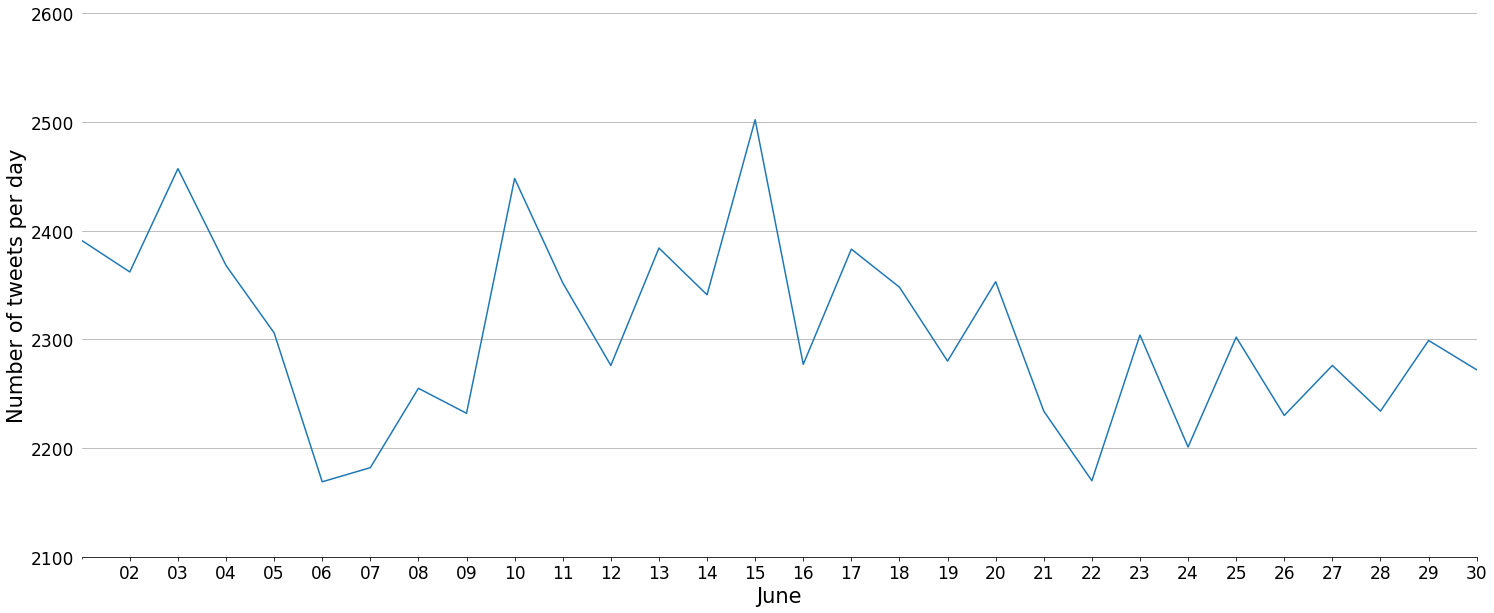

In [187]:
plot_daily(daily_tweets_germany.loc['2021-06-01':], "June",
           "Number of tweets per day", 'cw_img/daily_tweet_germany.png', 2100,2600)

In [154]:
germany_tweets_peak = tweets_euro_country[tweets_euro_country['country'] == 'Germany'].loc['2021-06-15'].drop_duplicates()

In [155]:
germany_tweets_peak.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1010 entries, 2021-06-15 00:00:00+00:00 to 2021-06-15 23:59:57+00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   long          1010 non-null   float64
 1   lat           1010 non-null   float64
 2   country       1010 non-null   object 
 3   city          1010 non-null   object 
 4   continent     1010 non-null   object 
 5   country_code  1010 non-null   object 
dtypes: float64(2), object(4)
memory usage: 55.2+ KB


In [158]:
tweets_germany = []
count = 0
for j,v in germany_tweets_peak[['lat','long']].iterrows():
    for i, value in df.loc['2021-06-15',['coordinates.coordinates','text']].dropna().iterrows(): 
        try:
            long, lat = value['coordinates.coordinates'][1:-1].split(', ')
            if float(long) == v['long'] and float(lat) == v['lat']:
                print(value['text'])
                tweets_germany.append(value['text'])
                break
        except:
            print('ignore nan')
            
    count +=1
    if count%100 == 0:
        print(count)



&lt;3 &lt;3
01:42 Temp. 18.8°C, Hum. 73%, Dewp. 12.8°C, Bar. 1012 hpa, Rain Today 0 mm, Wind 258° 5.0 km/h
01:55 Temp. 14.3°C, Hum. 78%, Dewp. 9.6°C, Bar. 1017.6 hpa, Rain Today 0 mm, Wind 212° 4.0 km/h
01:48 Temp. 13°C, r.Fe. 90%, Taup. 10.9°C, Druck 1018.9 hpa, Regen heute 0 mm, Wind 270° 1.1 km/h
Aktuell messen wir in Weingarten 16.2°C bei einer Luftfeuchtigkeit von 86%. #wetter #weingarten
01:52 Temp. 19.9°C, r.Fe. 65%, Taup. 12°C, Druck 1018.7 hpa
01:47 Temp. 22.8°C, Hum. 54%, Dewp. 12.1°C, Bar. 1014.9 hpa, Rain Today 0 mm, Wind 191° 1.1 km/h  #weatherdisplay #meteoware
01:50 CEST: 🌡15,3℃, 🌀  S, Ø 0 ㎞/h, 🔝 0 ㎞/h, Luftfeuchte: 79%, 💧 (stdl.) 0,0㎜, Druck: 1016 ㍱, langsam fallend https://t.co/VgrYvOXCBt
#nowplaying #Leony ~ Leony | Faded Love ||| #bbradio #rockt #berlin
Aktuelle Temperatur 20,20 Grad Celsius
Birds - Photo by Kurt Arndt 2021
#water #photograph #fotografie #berlin🇩🇪 #tegelersee @ Am Tegeler See https://t.co/lJHtNwRfGr
hafencity moon @ Magdeburger Brücke https://t.co/6u

#Job #Controller (m/w/d) #Finance, #Schweinfurt https://t.co/dYVgn7pOg6
#Job #Prozessberater (m/w/d), #Frankfurt am #Main https://t.co/REqYt4bCEr
#Job #Bauleiter (m/w/d) #Petrochemie, #Emsland https://t.co/AifqqXowph
#Job #Software #Engineer (m/w/d), #Saarbrücken https://t.co/Ousswvz2qw
#Job #Vertriebsingenieur (m/w/d) #Automatisierungstechnik, #Eisenhüttenstadt https://t.co/gKYoZDtGLh
#Job #Elektrokonstrukteur (m/w/d) #EPLAN und #ELCAD, Großraum #Leipzig https://t.co/vHLikHNCXP
#Job #Ingenieur (m/w/d) #Materialwissenschaften, #Nordhessen https://t.co/pVfhq45fSe
#Projekt #SPS-#Programmierung und #Inbetriebnahme, Raum #Lippstadt, #SPS #Inbetriebnahme #IBN https://t.co/EFlHM5hGEM
100
#Projekt #Consulting im Bereich #SAP #QM, Raum #Wuppertal https://t.co/yN3hDcNFLj
#Projekt #SPS-#Programmierung und #Maschineninbetriebnahme, Bad #Neustadt a.d. #Saale, #SPS https://t.co/MPSeoPGR5p
#Projekt #Disposition/#Disponent, #Bremen https://t.co/h5hncYZHHy
#Projekt #Erstellen von #Schweißzeichnungen #

I'm at Blumen Richter in Leipzig, Saxony https://t.co/5MInr712Tb https://t.co/7hdll2HU2N
Hat gerade ein Foto gepostet @ Mainz, Germany https://t.co/XmM011JeaQ
Don't submit then quit. Apply for jobs like "Wirtschaftsjurist (m/w/d) - Data Privacy DACH Region" at Thermo Fisher… https://t.co/YgoWMopD4z
Hat gerade ein Foto gepostet @ Sereetz, Schleswig-Holstein, Germany https://t.co/3u5OhJFMlr
#firstcoffee after a #worknight back in #productcellar  #💪  #tuesday @ Lübeck https://t.co/R0P3oiDH8i
Hat gerade ein Foto gepostet @ M-ONE Cafe-Bar Restaurant Bremen https://t.co/MO0PPcgxyK
Pretty Burger Foodtruck &amp;amp; Smoker onTour: Heute 11:30 bis 14:30 Uhr: hawo Farben, Durmersheimer Straße 130… https://t.co/O9VXwFrYkf
23:46 Temperature -1.8°C, Humidity 80 %, Pressure 1009.8 hpa, Rain Hour 0mm, Rain Day 0mm, Wind direction °, Wind s… https://t.co/rt4lEUisQ2
Moin! @ Hamburg-Horn https://t.co/IHFS74UyDi
Klarer Himmel bi 21,15°C
@DerBuddler Immerhin hat sie sich nicht auf der Tastatur zur Ruhe ge

Gestern Aben im Livestream haben wir weitergebaut an unserem BW und so sieht es nun bislang aus… @ Modelleisenbahnt… https://t.co/cwe8934BxY
@oaeblog Let's revisit that opinion on Thursday😉
Fotograf (m/w/d) für #Portrait und #Hochzeiten 20h/W in #Kornwestheim (Fest) #FotoatelierHahn #dasauge #jobs → https://t.co/HuxjVJbNdy
We're hiring in #Chemnitz, SN! Click the link in our bio to apply to this job and more: stellvertretender Abteilung… https://t.co/t8vobUzomX
@GRommerskirche Guten Morgen meine Liebe hab einen schönen Tag Kaffee hinstell
Hat gerade ein Foto gepostet @ MC GROUP https://t.co/9J8bBwfVqS
@ThelenUte Guten Morgen meine Liebe hab einen schönen Tag Kaffee hinstell
#mageriten #nureinewiese #ammergaueralpen #naturparkammergaueralpen #mehralsnurBerge #fenzlfoto #alpha6400… https://t.co/LPr0ALONb0
Hat gerade ein Foto gepostet @ Großkugel https://t.co/8wXledUwGo
I'm at AS Hofheim am Taunus (11) https://t.co/lRPoxiwyvR
Hat gerade ein Video gepostet @ https://t.co/nms92YKZHz https:/

Stop staring at the clock every day. It's time for a new career. Follow us to view jobs with titles like "Be- und E… https://t.co/DEGTFv8Wyq
Strzał, słupek, Szczęsny, bramka. Komu mieli uznać? Jak strzelający  trafił w słupek a że Nieszczęsny nie ma farta… https://t.co/29Ne4aQDLK
Hat gerade ein Foto gepostet @ Coolbox_essen https://t.co/lvsozmT8Xm
Webdesigner (m/w/d) – Schwerpunkt WordPress // in VZ oder TZ in #Kassel (Fest)
#Webdesign #Webentwicklung… https://t.co/7TWuM4PQFR
Nuttenbar Berlin -/- lecker Cocktails (@ Newton Bar in Berlin) https://t.co/uMJqSat5Ac https://t.co/D0c7VEjazF
Hat gerade ein Foto gepostet @ Würzburg https://t.co/ASm1viL7Z8
I'm at @Lidl in Flörsheim am Main, Hessen https://t.co/2I4j6FwzqO
I'm at Flörsheim am Main in Hesse https://t.co/gc3tOOwY0E
Hat gerade ein Foto gepostet @ Hagen, Niedersachsen, Germany https://t.co/7KhtFIzoQV
Acaba de publicar una foto en Philippsburg https://t.co/0vap1w56SN
Hat gerade ein Foto gepostet @ Vielfach Berlin -Das Kreativkaufhaus-

Acaba de publicar una foto en Bad Griesbach im Rottal https://t.co/XTThd30f8x
"Flight" / "Fliegen" 

#Haiku #Poetry @ Mecklenburg-Vorpommern, Germany https://t.co/zH5D4ID8Ok
Hat gerade ein Foto gepostet @ EVJ Ahrensburg https://t.co/8RgfasWNaY
Can you recommend anyone for this job? Paketzusteller in Freiburg/Umkirch (m/w/d) - https://t.co/eOAgZfWp5r… https://t.co/PL440DQvNO
Hat gerade ein Foto gepostet @ Saarland, Germany https://t.co/vfMMZjyO1x
Data Visualization Designer (m/w/d) in #München (Freelancer)
#schoeneneuekinder #dasauge #jobs → https://t.co/qrX2m2AIqe
More of Koblenz and of course my face😆 @ Koblenz, Germany https://t.co/JzFemnRcxA
Hat gerade ein Video gepostet @ LANXESS arena https://t.co/KOmI6jXlpL
Probesitzen im @boulevardtheaterbremen. Ein tolles Gefühl zu sehen, wie die riesige Tabakhalle mehr und mehr zum Th… https://t.co/MyCmuPezKA
What could possibly go wrong? 🤡  #MaskeAuf #DieMaskeBleibtAuf #SichereBildung #LebenRetten @KM_BW @RegierungBW  https://t.co/8TCMsG2Ez1


Hat gerade ein Foto gepostet @ Karlottas Kaffee &amp; Lieblingskram https://t.co/zxrpm6BZGj
#Job #Java #Softwareentwickler (m/w/d), #Hamburg https://t.co/FszYOSVqwW
#Job #Mechatroniker/#Elektrotechniker (m/w/d), #Itzehoe https://t.co/b3ZoK7SMml
#Projekt #Azure #DevOps #Entwicklung #Plugin, Raum #Nürnberg, #MS #Azure #DevOps #PlugIns https://t.co/twT6CJgXor
Hat gerade ein Foto gepostet @ Nails Hay https://t.co/cGzN1UCbma
I'm at Kreuz Stuttgart (51) (20) (2) in Vaihingen, Baden-Württemberg https://t.co/Hfjo9WtQBa
This #Transportation job might be a great fit for you. Click the link in our bio to see it and more. Paketzusteller… https://t.co/ICVWhb0sNW
Hat gerade ein Foto gepostet @ Buschhütten, Nordrhein-Westfalen, Germany https://t.co/rrs08TScsx
Endlich, heute war wichtigster Termin des Jahres. Ich erspare euch das Pflasterfoto. Stattdessen ein halber Bär. @… https://t.co/scSZebiuXG
Hat gerade ein Foto gepostet @ ArTik Freiburg https://t.co/6hZOSg82LY
Endlich wieder geöffnet! 🤤 (@ Bistr

I'm at Gaststätte Distelfarm in Stuttgart https://t.co/RmWioAzjRZ
I'm at Cospudener See in Markkleeberg https://t.co/33vvpGGOal https://t.co/5C0C44nAw5
Hat gerade ein Foto gepostet @ Keller Drei https://t.co/FfyXkxqxYf
Is this True or False 🤔 @ Bavaria, Germany https://t.co/tCGJ9265L7
I'm at Pucher Meer in Fürstenfeldbruck, Bayern https://t.co/2R8m0Vsyii https://t.co/iApinCOZeX
New landmark created! Discover interesting places around: https://t.co/IhjARermo5 https://t.co/t1RHn2tWCM
Hat gerade ein Foto gepostet @ L'Osteria https://t.co/AZ2wB2UrWn
Hat gerade ein Foto gepostet @ Therapy Recycle and Exorcise https://t.co/5pnRRUMbEo
Hat gerade ein Foto gepostet @ Zauberwald https://t.co/QqEjVJIrLc
Es ist mal wieder Zeit für das beste Eis der Welt. Physalis-Avocado, Cookies und Omas Apfelkuchen. 😋☀️🍦… https://t.co/aOPt1tI61a
Interested in a job in #Gera, Thuringia? This could be a great fit. Click the link in our bio to apply: Be- und Ent… https://t.co/0fjyEzricB
Ich bin gerade in Bus SB30 n

Mit Vollgas äh -tritt in den #Feierabend. Heute Abend dürfen ja andere #Laufen. #5km #joggen #stapelfeld #schulwald… https://t.co/ZTZelAynKe
Hat gerade ein Foto gepostet @ Berner &amp; Brown, die Tapas Bar im Domviertel https://t.co/nNxrmA5AEw
(Unbezahlte Werbung durch Verlinkungen) Schönen Feierabend! #fahrrad #bycicletour #trekkingbike #mybikemagazin… https://t.co/DaKV2zKA8x
Hat gerade ein Foto gepostet @ Rosenheim https://t.co/6NWBHqSWjq
E40 der BayernBahn Heute, am 15.06.21, um 17:45 durch Ochsenfurt mit ihrem Henkel-Zug @ Ochsenfurt https://t.co/jB6rXDVqnL
Hat gerade ein Foto gepostet @ Wolfenbüttel, Germany https://t.co/sCESgrVBKZ
Hat gerade ein Foto gepostet @ Burgplatz https://t.co/n9lMLixet8
Fa. Baumann / Werbung ned ganz professionell owa ehrlich #xs#xspowerdrink#baumannrobertdeadlift#luxurylifestyle#art… https://t.co/jVqYLRFNop
#onlinekochschule @maschinenkitchenbydesiree @ EGGHEAD Restaurant https://t.co/qIRoCcdREd
Mit @TeJaisSchmuck Essen an der Promenade 😁 #Butjadingen #N

@doc_scoop @Twittfort @spahn Darf man ihm sein Gehalt kürzen wegen dem Masken Skandal und zuwenig Impfstoff
👓 @ SSE Schwimm- und Sprunghalle im Europa-Sportpark https://t.co/bAiIMvcJsP
Hat gerade ein Foto gepostet @ Bauprofi-Preiser, ökologischer &amp; wohngesunder Innenausbau https://t.co/VnSyyHDE8f
Hat gerade ein Foto gepostet @ Niederwürzbach, Saarland, Germany https://t.co/NpNKhHHW37
Acaba de publicar una foto en Baden, Baden-Wurttemberg, Germany https://t.co/q6DI5y8OzU
Hat gerade ein Foto gepostet @ AMEOS https://t.co/3T5bWcPYUc
Ein Stück Normalität 😊❤ Auf einen erfolgreichen Abend! 🇩🇪 #FRAGER @ Rosi's https://t.co/X8ocY5kP4N
Hat gerade ein Foto gepostet @ Bochum, Germany https://t.co/sXsU7i6fgm
Hat gerade ein Foto gepostet @ Speyer, Germany https://t.co/4c2kSEgZnK
Hat gerade ein Foto gepostet @ Ingelheim Am Rhein, Rheinland-Pfalz, Germany https://t.co/WsysapdpEl
I'm at Einfach So! in Nürnberg https://t.co/cplVuGqxWa
E o bisavô celebrando agora! #portugal #euro2020 em Friedrichsha

Motion Designer (m/w/d) in Vollzeit in #Neuss (Fest)
#motiondesigner #3d #cinema4d #Bildquadrat #dasauge #jobs → https://t.co/av3f4bL3y9
Time for new #professionalphotos pictured here Nir Avner #webpresence #cv #bios #prflyers #advertising #publicity… https://t.co/bbNnDLZZ5l
#ultimatefrisbee #tvverl #verl #ultimateverl #jointheteam #frisbeesport #disc #175g #discsports @ Verl, Germany https://t.co/8SCTQhjWLd
Just posted a photo @ Cars-Unlimited https://t.co/KD2Hk9gtuh
Hat gerade ein Foto gepostet @ Außenalster https://t.co/mb4Rmq1zN2
I'm at Ehemalige innerdeutsche Grenze in Groß Grönau, Schleswig-Holstein https://t.co/33X6hg18ST
Ja (@ Landesgrenze Mecklenburg-Vorpommern /Schleswig Holstein) https://t.co/CefYwLH11x
#Feierabendtour #Rundroute #Oberursel #ebike @ Oberursel https://t.co/20Xx9DoRYN
Einfach mal wieder gemeinsam draußensitzen...

https://t.co/GHlIWHFYVP

#chemnitz #sommer #juni #abends #feierabend… https://t.co/09BT26E4us
Das Leben ist schön 

Feierabendrunde Nordic Walking i

56db3db800p1BD9B
The world champions start their campaign with an assured victory in Munich. There wasn’t a huge amount in it but Fr… https://t.co/iXw74xrBVe
#frösche #frogsofinstagram #frogs #schlossparkdennenlohe #abkühlung #teich #pond Etwas zu beneiden sind die zwei Fr… https://t.co/XM6C8l8ruz
Back in the Woods https://t.co/DN7QbQ5yTW
Rinderfilet mit Trüffel und Pfifferlingen… #Paganini @ Ristorante pizzeria paganini baden baden https://t.co/mlVf0P8OPk
🤫 #loveyourself #sun #streamergirl #notfromthisworld @ Fröndenberg https://t.co/lvMaRRN4C6
Hat gerade ein Foto gepostet @ Bad Kösen https://t.co/tfNh2hYpD6
#indoorcycling #grundlagenausdauertraining
#garminfitness
#garminvivoactive3music 

#grauerwolf 
#altermann… https://t.co/WvFQRTTQDk
Auf dem Land aber noch in #hamburg genauer in #sülldorf @ Hamburg-Sülldorf https://t.co/dtJbL4yw4W
#Euro #Euro2020 -  #France 1 vs  #DieMannschaft Germany 0   

 Goals: Hummels (own goal)… https://t.co/mT1TPIhpHw
Just posted a photo @ Osnabrück, Germ

In [163]:
euro2020_de = []
for i in tweets_germany:
    if ("#euro2020" in i.lower()) or ('#frager' in i.lower()):
        euro2020_de.append(i)

In [164]:
euro2020_de

['Pomeczowe memy zacne! #EURO2020 #POLSVK',
 'Biedny ten mecz #HUNPOR #EURO2020',
 "Ein Stück Normalität 😊❤ Auf einen erfolgreichen Abend! 🇩🇪 #FRAGER @ Rosi's https://t.co/X8ocY5kP4N",
 'E o bisavô celebrando agora! #portugal #euro2020 em Friedrichshafen https://t.co/c0WcwYBu5b',
 '@Cristiano nie pije @CocaCola to i są rezultaty, tylko woda nie mylić z wódą @LaczyNasPilka @pzpn_pl @BoniekZibi #EURO2020',
 'Meine Aufstellung ist immer hinter dem Spieler! #GERFRA #EURO2020',
 '🇩🇪🆚🇫🇷 #EURO2020 (@ Salon zur wilden Renate in Berlin) https://t.co/suNz8AIag4',
 '0\' #FRAGER Ein Lieblingsvorwurf der 80 Millionen Bundestrainer an Joachim Löw richtet sich gegen dessen "Sturheit"… https://t.co/gyfPbCQ0pi',
 '#GERFRA #euro2020 #coronablues wegspielen! Wir sind bereit ⚽️ @ Hoppegarten /OT Hönow https://t.co/KiZrnhY69G',
 '@matshummels piękna bramka! 1:0 dla Francji! #EURO2020',
 'Erstes Tor für Schland!!! Die nächsten dann aber besser ins gegnerische Tor ... #EURO2020',
 '#FRAGER ⚽️ - Drinking a SE

We can see from the plot that there is a significant increase on the 15th of june in the numbers of tweets, that is mainly due to the EURO2020 football match where Germany played against France and lost. We can also see from some of the tweets that they contain #EURO2020 refering to the game. We can also confirm from DW in the following link: https://p.dw.com/p/3uzhk

🇫🇷 Frankreich vs. Deutschland 🇩🇪 @ Mönchengladbach https://t.co/dDGHDxzMJd
#FRAGER ⚽️ - Drinking a SESSION Fashion IPA by BierCafé West @ BierCafé West  — https://t.co/74YEALlEyq

In [171]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import stop_words

def generate_wordcloud(s, width, height, path_save_img):
    stopwords = STOPWORDS
    stopwords.add('https')
    stopwords.add('application')
    stopwords.add('posted')
    stopwords.add('t')
    stopwords.add('co')
    stopwords.add('rain')
    stopwords.add('humidity')
    stopwords.add('c')
    stopwords.add('wind')
    stopwords.add('mm')
    stopwords.add('hpa')
    stopwords.add('Temp')
    stopwords.add('en')
    for i in stop_words.get_stop_words('spanish'):
        stopwords.add(i)
    mask = np.array(Image.open('steve_jobs.png'))
    wc = WordCloud(
        mask= mask,
        colormap= 'Blues',
        background_color= 'white',
        stopwords=stopwords,
        width = width,
        height = height,
        collocations=False
    )

    
    plt.imshow(wc.generate(s), interpolation='bilinear')
    plt.axis('off')
    plt.show()
#     wc.to_file(path_save_img)

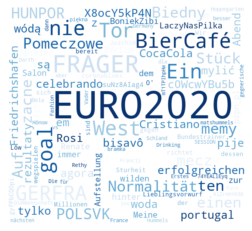

In [173]:
generate_wordcloud(' '.join(euro2020_de),1600, 1000, "cw_img/germany_wordcloud.png")

## UK

In [181]:
daily_tweets_uk = tweets_euro_country[tweets_euro_country['country'] == 'United Kingdom'].resample('D').count()['city']

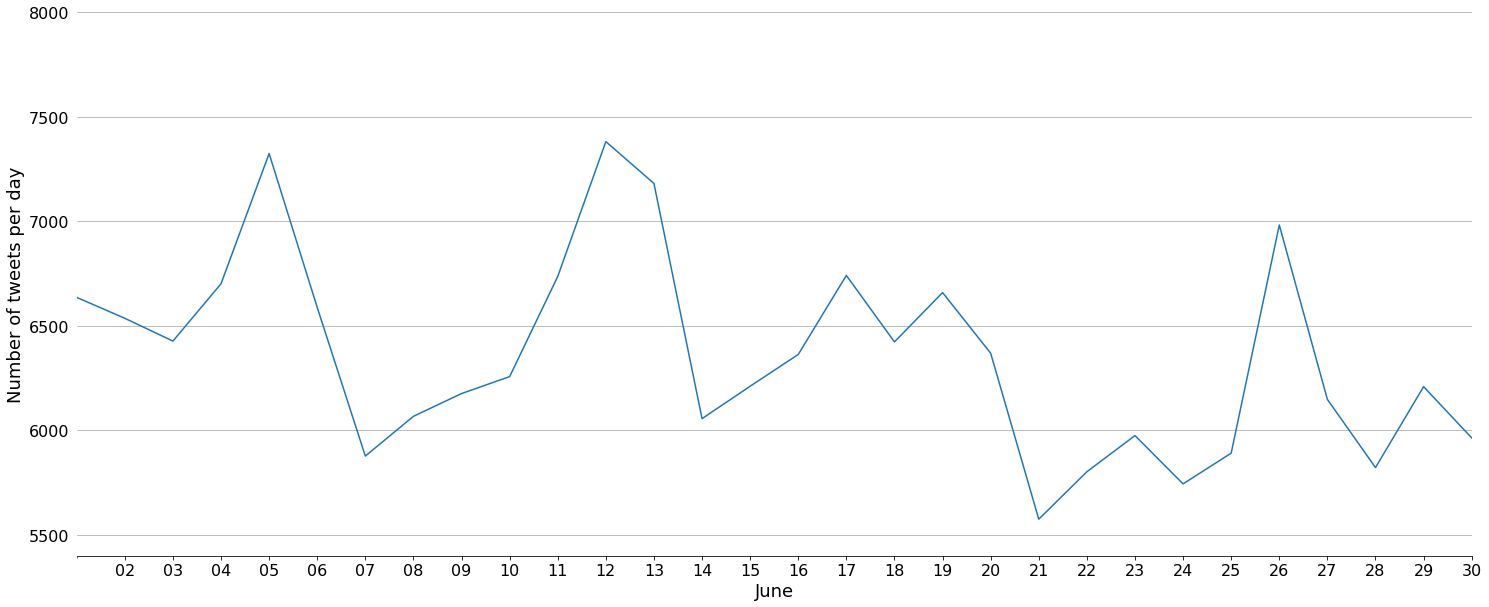

In [183]:
plot_daily(daily_tweets_uk.loc['2021-06-01':], "June", 
           "Number of tweets per day", 'cw_img/daily_tweet_uk.png', 5400,8000)

In [271]:
uk_tweets_peak = tweets_euro_country[tweets_euro_country['country'] == 'United Kingdom'].loc['2021-06-12'].drop_duplicates()

In [272]:
uk_tweets_peak.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4135 entries, 2021-06-12 00:00:00+00:00 to 2021-06-12 23:51:17+00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   long          4135 non-null   float64
 1   lat           4135 non-null   float64
 2   country       4135 non-null   object 
 3   city          4135 non-null   object 
 4   continent     4135 non-null   object 
 5   country_code  4135 non-null   object 
dtypes: float64(2), object(4)
memory usage: 226.1+ KB


In [276]:
tweets_uk_26 = []
count = 0
for j,v in uk_tweets_peak[['lat','long']].iterrows():
    for i, value in df.loc['2021-06-26',['coordinates.coordinates','text']].dropna().iterrows(): 
        try:
            long, lat = value['coordinates.coordinates'][1:-1].split(', ')
            if float(long) == v['long'] and float(lat) == v['lat']:
                print(value['text'])
                tweets_uk_26.append(value['text'])
                break
        except:
            print('ignore nan')
            
    count +=1
    if count%100 == 0:
        print(count)
        if count == 1000:
            break


In [74]:
tweets_uk[:10]

['Wind 1.0 mph WSW. Barometer 1021.4 hPa, Rising slowly. Temperature 12.8 °C. Rain today 0.0mm. Humidity 80%',
 '00:54 Temp. 13.5°C, Hum. 82%, Dewp. 9.7°C, Bar. 1020.3 hpa, Rain Today 0 mm, Wind 229° 15.0 mph',
 '00:46 Temp. 15.7°C, Hum. 85%, Dewp. 12.5°C, Bar. 1021.3 hpa, Rain Today 0 mm',
 '01:00 GMT: Temp: 10.7°C, Wind: 0 mph (ave), 0 mph (gust), Humidity: 37%, Rain (hourly) 0.0 mm, Pressure: 1055 hPa,… https://t.co/UwdTaavv4F',
 '00:47 Temp. 15.7°C, Hum. 76%, Dewp. 10.5°C, Bar. 1019.7 hpa, Rain Today 0 mm, Wind ° 0 km/h',
 'Steeple Aston is a village and parish on the edge of the Cherwell Valley, in the Wootton Hundred of Oxfordshire, ab… https://t.co/ALHlMIvldz',
 'Wind 3 mph S. Barometer 1034.9 hPa, Rising slowly. Temperature 17.1 °C. Rain today 0.0mm. Humidity 79%',
 '00:55 Temp. 16.9°C, Hum. 76%, Dewp. 11.6°C, Bar. 1021.6 hpa, Rain Today 0 mm, Wind 191° 1.1 km/h',
 '00:55 Temp. 18.5°C, Hum. 74%, Dewp. 12.7°C, Bar. 1018.8 hpa, Rain Today 0 mm, Wind 143° 1.1 m/s',
 '00:49 Temp. 1

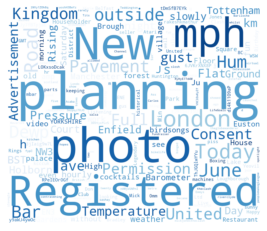

In [275]:
generate_wordcloud(' '.join(tweets_uk_26),400,600,'cw_img/uk_wordcloud.png')

We can see from the plot that the numbers of tweets start increasing from 21 June where it reached out the peak on the 26th. That may possibly be due to the ease of lockdown restirictions and more leisure sites started to open again (https://www.gov.uk/government/publications/covid-19-response-spring-2021/covid-19-response-spring-2021-summary). In addition, the 26th of June is a Saturday where people usually go out more. We can see from the below wordcloud that some of the words are Gardens, Bar, Lake, fun, and club. The following example tweets illustrates that most people are having fun during that day.

## Italy

In [174]:
daily_tweets_it = tweets_euro_country[tweets_euro_country['country'] == 'Italy'].resample('D').count()['city']

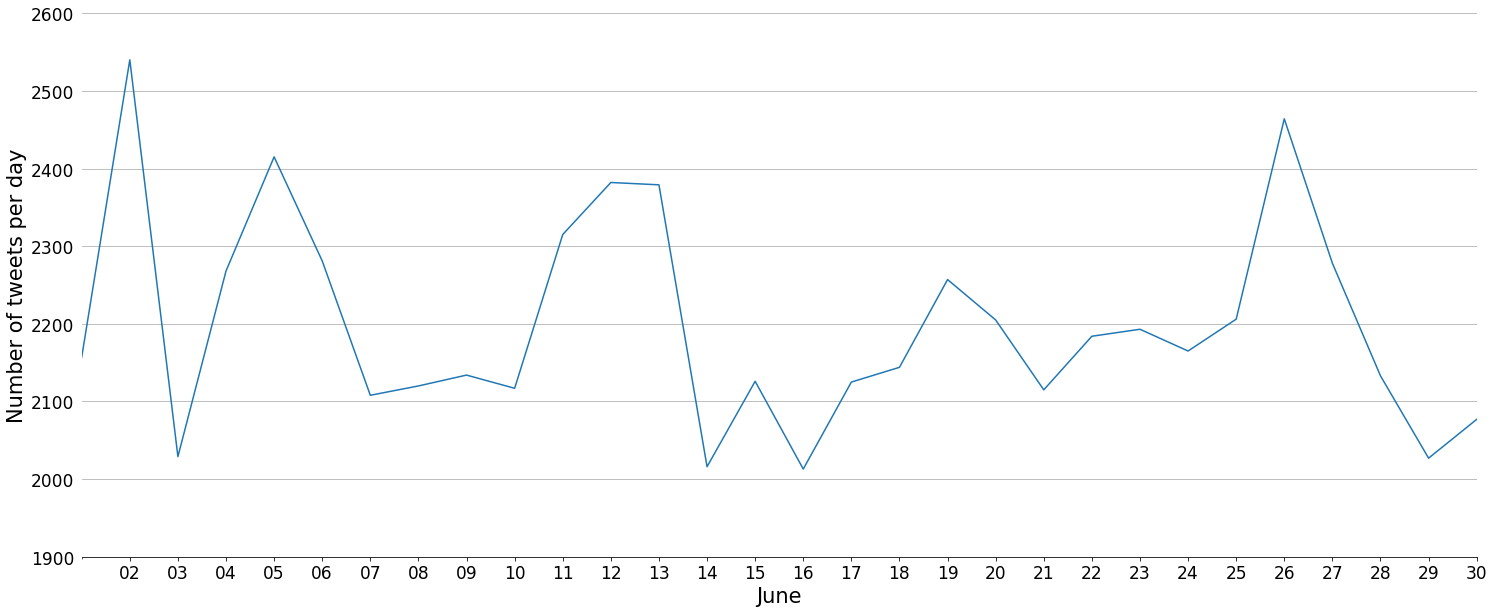

In [188]:
plot_daily(daily_tweets_it.loc['2021-06-01':], "June", 
           "Number of tweets per day", 'cw_img/daily_tweet_italy.png',1900 ,2600)

In [288]:
it_tweets_peak = tweets_euro_country[tweets_euro_country['country'] == 'Italy'].loc['2021-06-02'].drop_duplicates()

In [290]:
tweets_it = []
count = 0
for j,v in it_tweets_peak[['lat','long']].iterrows():
    for i, value in df.loc['2021-06-02',['coordinates.coordinates','text']].dropna().iterrows(): 
        try:
            long, lat = value['coordinates.coordinates'][1:-1].split(', ')
            if float(long) == v['long'] and float(lat) == v['lat']:
                print(value['text'])
                tweets_it.append(value['text'])
                break
        except:
            print('ignore nan')
            
    count +=1
    if count%300 == 0:
        print(count)
        break

02:00
Temp. 14,4°C App. 13,5°C
Umid. 70% 
Pioggia/Rain 0,0 mm 0,0 mmh
Vento/wind 2,5 Kmh E F1 Max 5,0 Kmh
Press. 10… https://t.co/wiGChLydAk
01:46 Temp. 15.4°C, Hum. 79%, Dewp. 10.8°C, Bar. 1016.4 hpa, Rain Today 0 mm, Wind 310° 5.0 km/h
Panzer in #roma #italia.
.
.
.
.
.
#ww2 #nowandthen #ww2nowandthen #1944 #panzer en Foro Romano -Roma, Italia https://t.co/MjIEPc1oUB
La figa super carnosa di una bruna arrapata estremamente grassa viene inchiodata https://t.co/8lJrrtIa4u #porno #videoporno #sesso
Just posted a photo @ Anzio Grotte Di Nerone https://t.co/vEJQ5BDZ28
Foto appena pubblicata @ ROMA - città eterna https://t.co/TpKRESC55L
atenção atenção admirem todos o melhor homem do mundo em NONNO &lt;3 https://t.co/SocOxvMU7A
Ma le forze dell'ordine giurano sulla Costituzione o sul DPCM? @ Repubblica delle banane https://t.co/qXefvRSQM6
Allora però dé.
Acá cuando nuestro cubano bello 🇨🇺 @willevy actuando en su primera película #retazosdevida y y hablo de sus recuerd… https://t.co/I0yYp8K

Just posted a photo @ Alta Formazione professionale cucina e ristorazione Tione di Trento https://t.co/XDWQ6IBrxR
💖💖💖 ricordiamo a tutti che oggi, mercoledì 2 Giugno, CHIChuahua Boutique sarà aperto dalle 15 alle 19 💖💖💖
......vi… https://t.co/FIklXfiQwl
#ristoranteallupo #rovereto#amici #carneallagriglia #wagyubeef #costate #pizzanapoletana #frittodimare @ Rovereto,… https://t.co/6cEhAaneSM
Video appena pubblicato @ Lucera https://t.co/5WYdVj3xxe
Buongiorno🌝⏰ 🖤🌹🌹🌹 @ Borgoratti https://t.co/WJz9Z3kYTr
05:33 IZ3GOS (Enrico) on I/VE-249 (Monte Enna, 975m, 2 pts) 14.275 SSB: QRV now [IZ3GOS]
Foto appena pubblicata @ Bogys Modernariart https://t.co/zTMfHid0N6
Liceo Ceccano Festa della Repubblica, il prefetto Portelli affida la Costituzione ai ragazzi diventati maggiorenni,… https://t.co/S2XcULTNIS
Sempre più lento
Ottimo allenamento 
Un po’ più attento... @ Strada Napoleonica https://t.co/neIphbhLoC
Io sono pronta , andiamo! @ Spinetta Marengo, Piemonte, Italy https://t.co/tVetRlJM2A
Regali

I virtuosismi fotografici delle 8:50 🌞
.
.
.
.
#dayoff #shadow #ombre #peterpan #sunnyday @ Caposiena Mansion https://t.co/OBk7gmgi19
Foto appena pubblicata @ PalaMazzola https://t.co/d6Sp1CH60u
Tomando mi café matutino
#sandracuervo en Caffetteria Failla https://t.co/vSdFsx1V9t
🧘‍♀️🤸🏽🧚🏿🧞‍♀️🦋❤️🐾👣 (@ Scuola Di Ashtanga Yoga Milano in Milano, MI) https://t.co/UI5f7LzK7t
Foto appena pubblicata @ Aosta, Italy https://t.co/UnEUhm9uIu
New creation by @_kork1975_ @ Castione della Presolana https://t.co/wxhAN1X2a5
Foto appena pubblicata @ Scoglitti, Sicilia, Italy https://t.co/9RcxhqCylY
Foto appena pubblicata @ Museo Ettore Fico https://t.co/CNLSY3VjQ5
#buonarepubblicaatutti #2giugno🇮🇹 @ Motteggiana https://t.co/VXbUwjCCQo
Foto appena pubblicata @ August Columbo Fotografia Ala5 https://t.co/NrqSRvytdy
Foto appena pubblicata @ Ospedale C.T.O.  Firenze https://t.co/zy8FDjXGTJ
Discover hotels around Provincia di Salerno, Italy from 15 EUR per night: https://t.co/sVsyttvr3t https://t.co/hWAfdATmD

La nostra Casa oggi compie 75 anni! Auguri alla Repubblica italiana! 🇮🇹

#FestaDellaRepubblica #2giugno
#Tempocasa… https://t.co/z8LltA3ZPY
𝑯𝒂𝒎𝒎𝒆𝒓𝒔 𝑽𝑺 𝑩𝒍𝒖𝒆𝑺𝒕𝒐𝒓𝒎𝒔 𝑯𝑰𝑮𝑯𝑳𝑰𝑮𝑯𝑻𝑺 

Video partita e highlights disponibili sui canali YouTube 
𝐇𝐚𝐦𝐦𝐞𝐫𝐬𝐅𝐨𝐨𝐭𝐛𝐚𝐥𝐥 
e
𝐂𝐢… https://t.co/8ZeHjAu1vO
Foto appena pubblicata @ Bassano del Grappa https://t.co/3LNrHu2pVs
Foto appena pubblicata @ Matatoio https://t.co/ceK1wdoWjo
La nostra Casa oggi compie 75 anni! Auguri alla Repubblica italiana! 🇮🇹

#FestaDellaRepubblica #2giugno
#Tempocasa… https://t.co/N7zYRKwgn0
Buona giornata a tutti 
#cicloriparatorepazzo
#rentalbike
#noleggiobici 
#noleggioefatbike 
#rental @ F.lli Bossi https://t.co/yg1WRq92TQ
Foto appena pubblicata @ CENTRO PODOLOGICO PACILIO del Dott. A. Pacilio https://t.co/A3LIqzj4ey
New Arrivi BUGLIONEAUTO @ BuglioneAuto Di Buglione Michele https://t.co/JMkl29iRtw
Foto appena pubblicata @ Prato, Italy https://t.co/iRKuzQtSzo
E vabbè....#stagione2021 #falconaraonline #marchetourism #lemiemarche #vol

#2giugno #festadellarepubblica #stato #italia #freccetricolori #wlitalia… https://t.co/sWZ2s0dWEg
W l’italia e W la Repubblica ❤️ giorno e #buonagiornata #2giugno2021🇮🇹 @ Ospedaletti https://t.co/jMLt3LOu0o
Buona Festa della Repubblica @ Centro Storico Nardò https://t.co/FB0FaEJlYH
Acaba de publicar una foto en Porta camollia Siena https://t.co/clovaBNqf4
Buona festa della repubblica italiana a tutti 🇮🇹 #2giugno #festadellarepubblicaitaliana #75anniversario @ Settimo T… https://t.co/9pp5nUTo5E

Although Italy has seen a large number of tweets in some days of June, the 2nd of June has seen a large amount of tweets with a severe decrease in the following day. That is due to the fact that the 2nd of June is a public holliday called Republic Day. Most of people that day were on a day-off to celebrate. However, the following day was a still a weekday, people had to go back to work/study which explains the decrease in the number of tweets. If the next day was a weekend, we might expect a slightly higher number.

## Spain

In [226]:
fig = go.Figure(go.Densitymapbox(lat=tweets_per_spain_b7.lat, 
                                 lon=tweets_per_spain_b7.long, 
                                 z=np.ones(len(tweets_per_spain_b7)),
                                 radius=1, 
                                 opacity=0.8, 
                                 colorscale= ['#e6e6e6','#003554'], showscale = False))
fig.update_layout(mapbox_style="carto-positron", title_text='Density of the numbers of tweets per location',
                  title_x=0.5, colorway = ['#e6e6e6','#003554']).show(renderer='chrome', zoom=8, 
                                                                      center = {'lat': 46, 'lon': 2.2})

In [209]:
daily_tweets_sp = tweets_euro_country[tweets_euro_country['country'] == 'Spain'].resample('D').count()['city']

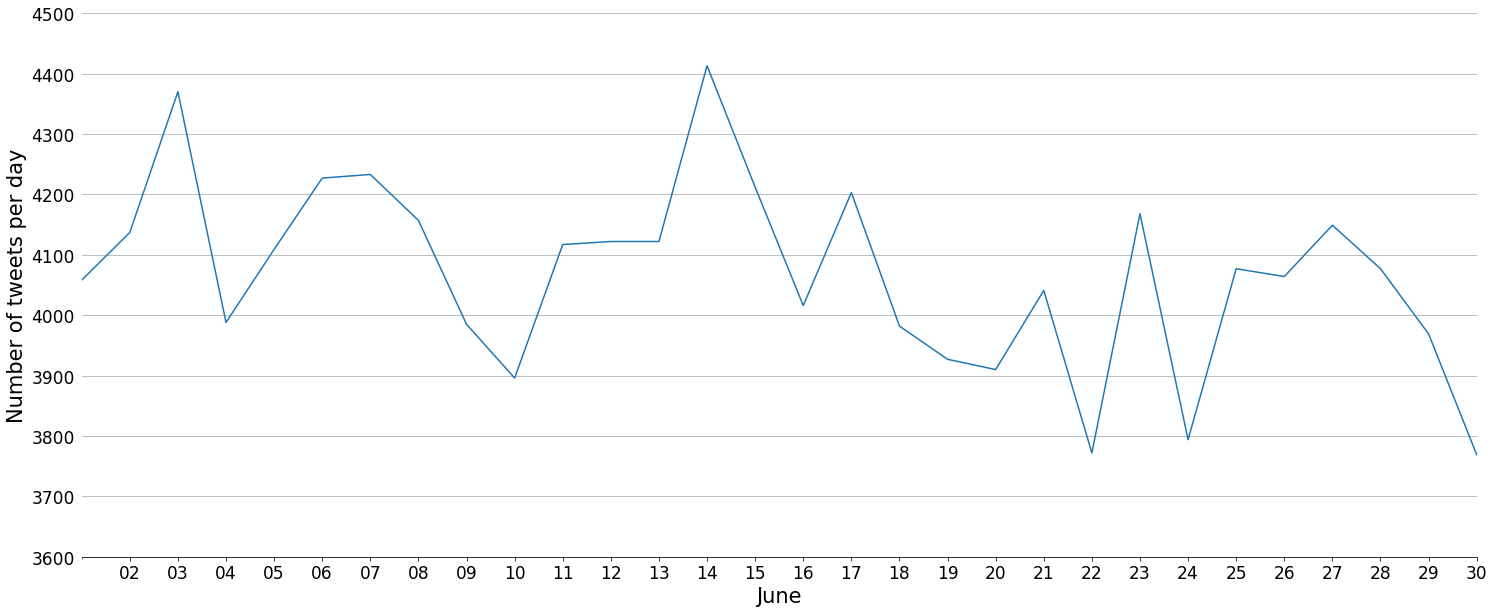

In [214]:
plot_daily(daily_tweets_sp.loc['2021-06-01':], "June", 
           "Number of tweets per day", 'cw_img/daily_tweet_spain.png',3600 ,4500)

In [215]:
sp_tweets_peak = tweets_euro_country[tweets_euro_country['country'] == 'Spain'].loc['2021-06-02'].drop_duplicates()

In [218]:
tweets_sp = []
count = 0
for j,v in sp_tweets_peak[['lat','long']].iterrows():
    for i, value in df.loc['2021-06-14',['coordinates.coordinates','text']].dropna().iterrows(): 
        try:
            long, lat = value['coordinates.coordinates'][1:-1].split(', ')
            if float(long) == v['long'] and float(lat) == v['lat']:
                print(value['text'])
                tweets_sp.append(value['text'])
                break
        except:
            print('ignore nan')
            
    count +=1
    if count%100 == 0:
        print(count)




Són les dues en punt de la nit
Temp:23,3°C ⇊
Temp.Aparent:22.8°C
Hum:48% ⇈
Pres:1019,4 mbar ⇈
Pluja Avui:0,0 mm
Vent:1,3 m/s (S) ⇈
#Lleida #LaBordeta #meteo #meteocat
01:55 Temp. 22.3° C, Hum. 62%, Dewp. 13.6° C, Bar. 1022.6 hpa, Rain Today 0 mm, Viento ° 0 km / h
01:50 Temp. 22.1°C, Hum. 75%, Dewp. 16.4°C, Bar. 1020.9 hpa, Wind 237° 2.2 km/h
01:49 Temp. 21.3°C, Hum. 68%, Dewp. 14°C, Bar. 1034.7 hpa, Rain Today 0 mm, Wind ° 0 km/h  #Weather #Tietar #Casavieja
01:43 Temp. 22.9° C, Hum. 81%, Dewp. 18.6° C, Bar. 1016 hpa, Rain Today 0 mm, Viento 90° 1.1 km / h  #Errenteria #Orereta #NetatmoPWS
01:48 Temp. 17.7°C, Hum. 78%, Dewp. 12.9°C, Bar. 1021.5 hpa, Rain Today 0 mm  #meteowareplus #olost #eltemps #meteocat #meteo
01:43 Temp. 25.3°C, Hum. 53%, Dewp. 14.2°C, Bar. 1015.8 hpa, Rain Today 0 mm, Wind 202° 4.0 km/h
Burbuja culo rubia puta da cabeza y cabalga polla como un profesional https://t.co/NprOxypGwu #porn #freeporn #porno
#CMI Canet de Mar. Dades a les 2:00 Hores: 26.5ºC, 48%, (30ºC)

Acaba de publicar una foto en Salamanca, Spain https://t.co/uOZXzVWv24
Feliz lunes. #SALUD #SANTE #CHEERS #vins #vino #wine #vinum #invinoveritas #wineday #winelover #vinummedia… https://t.co/0EDyKxaVx9
En Acrópolis Gym,
Calle Campo Sagrado,
n°53. 
Actividad Fitness. 
Gijón, Asturias, España. en Gijón, Asturias https://t.co/3Z8RWShzKq
Massages pour femmes. Toutes les infos sur ce massage érotique au #FelinaMassage. Essayez-le dès maintenant : https://t.co/hJPgIG3uyO
Novedad Masajeador inalámbrico VIBEFX

#barberia #barberiamadrid #barberosespaña

https://t.co/NCJRxU2Hlg en SYSTEM… https://t.co/uvuqroGUmq
200
Bon dia #Matadepera! Temperatura a les 8.00h: 25.0°C - Humitat: 48% https://t.co/352MAJ2ObQ
Dades a les 08:00: 28.5ºC, 49.0%, 1017.7 hPa, 5 km/h SSE
@rocarey bajo la tormenta en Valladolid ⛈
.
.
#tauromaquia #valladolid #españa #rocarey #toros #sialostoros en Vall… https://t.co/BGYPiWXJgO
Acaba de publicar una foto en Mataró https://t.co/bOwn9AcObB
Acaba de publicar una foto en Alm

#IncDGT el 13-03-2021 18:24:00 tipo #OBRA (TRABAJOS DE MANTENIM...) #ROJO en #LA_RIOJA (BERCEO) vía #LR206 #PK12_9 AMBOS SENTIDOS
#IncDGT el 14-03-2021 22:10:00 tipo #PRECAUCIÓN (ENTRADA CERRADA) #ROJO en #ZARAGOZA (PUEBLA DE ALFINDEN (LA)) vía #A2 #PK332_6 DECRECIE...
#IncDGT el 14-03-2021 22:54:00 tipo #PRECAUCIÓN (SALIDA CERRADA) #ROJO en #ZARAGOZA (PUEBLA DE ALFINDEN (LA)) vía #A2 #PK334_2 DECRECIEN...
#IncGNAVARRA el 03-04-2021 00:00:00 tipo #OBRA ( ) #AMARILLO en #Navarra (NAVARRA) vía #AP15 #PK50
#IncGARAGON el 07-04-2021 tipo #PRECAUCIÓN (Obras) #AMARILLO en #Zaragoza ( ) vía #A1506 #PK
#IncGNAVARRA el 13-04-2021 00:00:00 tipo #OBRA ( ) #AMARILLO en #Navarra (NAVARRA) vía #NA7230 #PK1
#IncAYUNTZGZ el 10-05-2021 00:00:00 tipo #OBRA ( ) #NEGRO en #Zaragoza (Zaragoza) vía #Avda. Duquesa Villahermosa con Vía Hispanidad Cor...
#IncAYUNTZGZ el 12-05-2021 00:00:00 tipo #PRECAUCIÓN ( ) #ROJO en #Zaragoza (Zaragoza) vía #C\Bretón Cortes de Tráfico
#IncAYUNTZGZ el 17-05-2021 00:00:00 tip

Acaba de publicar una foto en Parla Este https://t.co/71QSHFTPdm
Nueva entrada en el blog
Las canciones en la publicdad
https://t.co/BhiqvInBpr en Vigo, Spain https://t.co/MF3aSfZ3wv
#we_like_valencia #total_castellon #espanacomunidadesautonomas #tot_valencia #igers_cs #total_mediterraneo en Morel… https://t.co/bANliUmR2B
Left is perfect but Right is 🚀💥
#dembelle
#france 
#fcbarcelona 
#fcbarcelonafans 
#leomessi 
#laliga @ Camp Nou (F… https://t.co/015Ex54n4g
Lunes en alegria del bollo https://t.co/Sjj6oPs41Y
Acaba de publicar una foto en San Roque, Spain https://t.co/DwBNBkHmsf
Acaba de publicar una foto en Velodromo San Vicente https://t.co/fBAwRZ0er9
Acaba de publicar una foto en Legazpia, Pais Vasco, Spain https://t.co/9FD0OqufWg
Acaba de publicar una foto en Vitoria-Gasteiz, Pais Vasco, Spain https://t.co/Dr4nfta30l
Relámpagos!! en Arganda del Rey https://t.co/4ZOXVHFf75
No soy yo, es el caballo que es un artista.

🐴 Ocioso, semental PRE cartujano. en Chiclana de la Frontera, Spa

KeyboardInterrupt: 